# Python Learn by Doing: ENSO Analysis

**Developed By:** Dr. Kerrie Geil, Mississippi State University

**Original Development Date:** May 2024

**Package Requirements:** xarray, netcdf4, numpy, pandas, scipy, rioxarray, matplotlib, cartopy, jupyter

**Hardware requirements:** 1GB available storage on your machine, 8GB RAM

**Links:** **[OSF project link](https://osf.io/zhpd5/)**, [link to this notebook on github](https://github.com/kerriegeil/MSU_py_training/blob/main/learn_by_doing/enso/enso_analysis.ipynb)

**Description:**

This notebook helps the learner build intermediate python programming skills through data query, manipulation, analysis, and visualization. Learning will be centered around the El Nino Southern Oscillation (ENSO) mode of global climate variability and its relationship to global temperature and precipitation. The notebook is aimed at learners who already have intermediate programming skills and some knowledge of statistics. 

# Collection of Useful Links

- all python trainings modules developed by Dr Kerrie Geil can be found in the [OSF MSU_py_training project](https://osf.io/zhpd5/) on the Open Science Framework platform. There you will find links to the most updated versions of the training notebooks on github as well as any required data files.
- [kerrie's github repo](https://github.com/kerriegeil/MSU_py_training) contains python codes but not data files. This repo is linked to the OSF MSU_py_training project above
- [documentation page for every version of Python](https://www.python.org/doc/versions/)
- every version of Python also includes a tutorial e.g. [The Python Tutorial v3.12.3](https://docs.python.org/release/3.12.3/tutorial/index.html)
- this is not technically a link, but Google is your friend! If there is something you want to learn how to do with python, just Google it and click through the search results to see if you can find an answer. A Google search will often return results from online forums like Stack Overflow where someone has asked the same question and received several answers. This same principle works for figuring out conda and jupyter things. Chances are the answer is a quick web search away
- [jupyter markdown cheat sheet](https://notebook.community/tschinz/iPython_Workspace/00_Admin/CheatSheet/Markdown%20CheatSheet)
- [xarray documentation](https://docs.xarray.dev/en/stable/) which includes the api reference, getting started guide, user guide, and developer info
- [Statistical methods in the atmospheric sciences by Daniel Wilks](https://www.google.com/books/edition/Statistical_Methods_in_the_Atmospheric_S/fxPiH9Ef9VoC?hl=en&gbpv=0) the textbook I turn to often when I need a climate science statistics refresher (very descriptive with examples)
- [Statistical analysis in climate research by von Storch and Zwiers](https://www.google.com/books/edition/Statistical_Analysis_in_Climate_Research/bs8hAwAAQBAJ?hl=en&gbpv=0) the quick reference I turn to for climate science statistics (less descriptive, but broader content)

# Introduction to the El Nino Southern Oscillation (ENSO)



<video controls width="560" height="315" src="https://oceanservice.noaa.gov/facts/elninolanina/otkn_721_elninolanina_lg.mp4">animation</video>


ENSO is a feature of Earth's natural climate variability that impacts weather globally. It has 3 phases (described in the short video above): El Nino (warm tropical Pacific), La Nina (cool tropical Pacific), and neutral (normal tropical Pacific). 

Over North America, the phase of ENSO modulates the location of the jet stream as well as the storm systems traveling along the jet stream. This results in areas of wetter/drier and cooler/warmer weather during El Nino and La Nina conditions. Weather impacts from El Nino and La Nina are generally strongest in winter months over North America.

Here's a bit more reading if you are interested:
- [NOAA Ocean Service: what are el nino and la nina](https://oceanservice.noaa.gov/facts/ninonina.html#:~:text=El%20Ni%C3%B1o%20causes%20the%20Pacific,life%20off%20the%20Pacific%20coast.)
- [NOAA climate.gov: ENSO in a nutshell](https://www.climate.gov/news-features/blogs/enso/what-el-ni%C3%B1o%E2%80%93southern-oscillation-enso-nutshell)
- [NOAA: the jet stream](https://www.noaa.gov/jetstream/global/jet-stream) and [NOAA: what is the jet stream?](https://scijinks.gov/jet-stream/#:~:text=Jet%20streams%20are%20located%20about,where%20we%20live%20and%20breathe.)

Scientists have developed a few different "indexes" for tracking the phase and strength of ENSO. These indexes are usually comprised of monthly sea surface temperature anomalies from different regions in the tropical Pacific ocean. However, there are many ENSO indexes including some that are created from surface pressure anomalies and others that are multivariate. Here's some more information.
- [UCAR Climate Data Guide: ENSO SST indices](https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni)
- [NOAA PSL: ENSO Index Dashboard](https://psl.noaa.gov/enso/dashboard.html)
- [NOAA climate.gov: why are there so many ENSO indexes?](https://www.climate.gov/news-features/blogs/enso/why-are-there-so-many-enso-indexes-instead-just-one)

In this notebook, we'll ask 6 science questions about ENSO and answer them using an ENSO index (Nino3.4 SST Index) as well as global sea surface temperature, air temperature, and preciptation data. 

# Science Questions

We'll investigate the following ENSO-related science questions (using simple statistics) as a way to pick up some useful intermediate python programming skills:

1) How many strong El Nino and La Nina events occurred from 1948-2023? 
2) Using composite analysis, what pattern do we see in sea surface temperature during strong El Nino and La Nina conditions? What is the approximate magnitude of the equatorial Pacific SST anomaly during these conditions?
3) Using composite analysis, where do strong El Nino and La Nina conditions during boreal winter (DJF) have a statistically significant relationship with winter temperature and precipitation globally?
4) Do the spatial patterns of anomalous temperature and precipitation during strong EL Nino and strong La Nina look similar? What is similar and different?
5) Where, globally, is there a statistically significant correlation between the winter mean (DJF) nino3.4 index and winter mean temperature and precipitation? 
6) How much variance in winter mean (DJF) precipitation and temperature is explained (r squared) by the winter mean nino3.4 index at the following locations? Pilot Station, AK; El Paso, TX; Medellin, Colombia; Johannesburg, South Africa; Davao, Philippines; Astana, Kazakhstan

**Disclaimer:** This notebook is intended for python programming learning. There are many datasets and statistical methods we could use to answer our science questions. The techniques used in this notebook are chosen for their simplicity since we are focused on learning intermediate programming skills as opposed to a focus on producing peer-review level analyses. You will undoubtedly see different techniques, thresholds, seasons, and more complex statisical methods used in ENSO literature. 


Your Turn

1) Using a shapefile with boundaries for countries in South America, show a table of which countries experience anomalous temperature and precipitation during strong El Nino and La Nina events

2) Show what happens if you play with the magnitude threshold for defining an ENSO event. Use 0.4, 0.7, and 1.0 thresholds to compare how many ENSO events are identified in the Nino 3.4 timeseries. Create the composite of winter temperature during El Nino conditions for each of these thresholds, calculate statistical significance for each composite, and show where there are differences in the results.  

3) Repeat science question 3 using October-March for the winter months. Show (quantify) the difference between results using DJF and results using ONDJFM.


# Importing Python Packages and Defining Your Workspace


In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import scipy.stats as ss
from scipy.signal import detrend
import rioxarray as rio

import warnings
import os
from urllib.request import urlretrieve

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.gridliner import LongitudeFormatter

In [2]:
# create a folder for data downloads
if not os.path.exists('./data'):
    os.makedirs('./data')

In [3]:
# filenames to save data to
nino_f = 'data/nino34_anomalies_monthly_NOAA.txt'
sst_f = 'data/sst_monthly_COBE2_JMA.nc'
t_f = 'data/tavg_monthly_BerkeleyEarth.nc'
pr_f = 'data/precip_monthly_PRECL_NOAA.nc'

# Obtaining the Data

We will need the following data over many data years:


data description | frequency | units | dataset name | source
---|---|---|---|---
nino 3.4 sea surface temperature index | monthly | C | Nino 3.4 SST index | [NOAA PSL](https://psl.noaa.gov/gcos_wgsp/Timeseries/Nino34/)
sea surface temperature | monthly | C | JMA COBE2 | [via NOAA PSL](https://psl.noaa.gov/data/gridded/data.cobe2.html)
average air temperature | monthly | C | BEST | [Berkeley Earth](https://berkeleyearth.org/data/)
precipitation | monthly | mm/day | NOAA PREC/L | [NOAA PSL](https://psl.noaa.gov/data/gridded/data.precl.html)

<br>

Next, we'll download the data files from Kerrie's **[OSF project MSU_py_training](https://osf.io/zhpd5/).**

The files stored in OSF were obtained from the sources listed in the table above in May 2024 using the script [get_enso_datasets.ipynb](https://github.com/kerriegeil/MSU_py_training/blob/main/learn_by_doing/enso/get_datasets/get_enso_datasets.ipynb). The reason we use OSF to store these files is to guarantee permanent availability of the exact same data files for this training module into the future.

<br>
<font color="green"><b>
**NOTE: You only need to run the following 4 urlretrieve cells once. The data files will then be located on your computer. These files total approximately 780MB in size. Depending on your internet download speed this could take anywhere from a few seconds to over an hour to download.**
</b></font> 






In [4]:
# Nino3.4 Index
url='https://osf.io/wjy9f/download' # url to the data
urlretrieve(url, nino_f) # download and save data

('data/nino34_anomalies_monthly_NOAA.txt',
 <http.client.HTTPMessage at 0x1c963bbc2f0>)

In [5]:
# precipitation
url='https://osf.io/gx74z/download' # url to the data
urlretrieve(url, pr_f) # download and save data

('data/precip_monthly_PRECL_NOAA.nc',
 <http.client.HTTPMessage at 0x1c963bbcb60>)

In [6]:
# sea surface temperature
url='https://osf.io/3qspm/download' # url to the data
urlretrieve(url, sst_f) # download and save data

('data/sst_monthly_COBE2_JMA.nc', <http.client.HTTPMessage at 0x1c963bbd3d0>)

In [7]:
# air temperature
url='https://osf.io/xv7m8/download' # url to the data
urlretrieve(url, t_f) # download and save data

('data/tavg_monthly_BerkeleyEarth.nc',
 <http.client.HTTPMessage at 0x1c963bbd730>)

# Data Cleaning

We'll execute the following steps on each dataset to prepare our data for analysis:

- make sure every dataset has identical dimension names and dimension order (time,lat,lon)
- make sure every dataset has identical time coordinate labels (datetimes at month start)
- subset to our analysis years 1948-2023 (the years that all datasets have in common)
- make sure longitudes are ascending from -180 to 180
- make sure latitudes are ascending
- calculate anomalies using base period 1981-2010 for sea surface temperature, precipitation, and air temperature

In [8]:
# data years in common across all the datasets is 1948-2023
# we'll subset in time to these years
year_start = '1948'
year_end = '2023'

# base period years (for anomalies)
base_start = '1981'
base_end = '2010'

## Nino 3.4 Index

This csv data file contains a row for each year of data and each column is one of 12 monthly anomaly values for the Nino 3.4 area. The base period used is 1981-2010.

There are plenty of ways to load data from a csv file, we'll use **[pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)** because there's some extra info in our data file beyond just rows and columns of numbers, and this function has a lot of useful parameters we can use.

Ultimately, we'll want to move this data into an xarray DataArray structure to make our lives easier when working with our other data variables that come from netcdf files.


In [9]:
# load nino3.4 index data into a pandas dataframe

nino_raw=pd.read_csv(nino_f,sep=r'\s+',skiprows=1,skipfooter=7,header=None,index_col=0,na_values=-99.99,engine='python')
nino_raw

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1870,-1.00,-1.20,-0.83,-0.81,-1.27,-1.08,-1.04,-0.88,-0.53,-0.92,-0.79,-0.79
1871,-0.25,-0.58,-0.43,-0.50,-0.70,-0.53,-0.60,-0.33,-0.24,-0.33,-0.31,-0.58
1872,-0.72,-0.62,-0.50,-0.77,-0.62,-0.52,-0.32,-0.85,-1.02,-0.94,-0.79,-0.88
1873,-0.78,-1.01,-1.31,-0.67,-0.53,-0.48,-0.58,-0.39,-0.34,-0.78,-0.77,-0.70
1874,-0.93,-1.06,-1.40,-0.94,-0.86,-0.72,-1.00,-1.05,-1.13,-1.25,-1.33,-1.14
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,0.64,0.48,0.36,0.49,-0.12,-0.21,-0.04,-0.42,-0.66,-1.19,-1.01,-0.98
2021,-1.04,-0.94,-0.72,-0.55,-0.41,-0.06,-0.20,-0.38,-0.50,-0.78,-0.88,-1.07
2022,-0.77,-0.68,-0.84,-0.90,-1.02,-0.77,-0.56,-0.96,-1.06,-0.99,-0.76,-0.86


There are multiple ways to go from pandas dataframes to xarray data arrays. Here, we'll first convert the 2D pandas dataframe (rows,columns) into a 1 dimensional numpy array (one long list of data values that will be ordered in time from 1870-01 to 2024-12). 

In the next line of code `.to_numpy()` comes from the pandas library **[pandas.DataFrame.to_numpy()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html)** and `.flatten()` comes from the numpy library **[numpy.ndarray.flatten()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html)**

In [10]:
# collapse the data into a 1D array (continuous timeseries)
# pandas dataframe --> 1D numpy array
nino=nino_raw.to_numpy().flatten()

len(nino),nino

(1860, array([-1.  , -1.2 , -0.83, ...,   nan,   nan,   nan]))

In [11]:
# create monthly datetimes
dates=pd.date_range('1870-01-01','2024-12-01',freq='MS')

len(dates),dates[0:3]

(1860,
 DatetimeIndex(['1870-01-01', '1870-02-01', '1870-03-01'], dtype='datetime64[ns]', freq='MS'))

In [12]:
# create an xarray object with metadata labels (time dimension and coordinate)
# 1D numpy array --> 1D xarray data array
nino=xr.DataArray(nino,name='nino',dims='time',coords={'time':dates})

# assign some variable attributes
nino.attrs['standard_name']='nino3.4 index'
nino.attrs['units']='C'
nino

<xarray.DataArray 'nino' (time: 1860)> Size: 15kB
array([-1.  , -1.2 , -0.83, ...,   nan,   nan,   nan])
Coordinates:
  * time     (time) datetime64[ns] 15kB 1870-01-01 1870-02-01 ... 2024-12-01
Attributes:
    standard_name:  nino3.4 index
    units:          C

In [13]:
# subset in time using labels
nino=nino.sel(time=slice(year_start,year_end))
nino

<xarray.DataArray 'nino' (time: 912)> Size: 7kB
array([ 0.05,  0.37,  0.63,  0.25,  0.31,  0.06, -0.06, -0.02, -0.02,
       -0.68, -0.3 ,  0.38, -0.46,  0.26, -0.55,  0.19, -0.07, -0.72,
       -0.39, -0.32, -0.65, -0.72, -1.33, -1.2 , -1.05, -1.5 , -1.07,
       -0.91, -1.3 , -0.86, -1.08, -0.63, -1.1 , -0.83, -1.38, -1.04,
       -1.13, -0.74, -0.77, -0.17, -0.1 , -0.09,  0.66,  0.9 ,  0.67,
        0.79,  0.78,  0.71,  0.39,  0.24,  0.04,  0.41, -0.38, -0.66,
       -0.59, -0.42, -0.35, -0.04, -0.32, -0.55,  0.36,  0.24,  0.22,
        0.77,  0.35,  0.41,  0.2 ,  0.04,  0.67,  0.11,  0.31,  0.15,
        0.39,  0.21,  0.01, -0.32, -0.53, -0.8 , -1.02, -1.08, -1.03,
       -0.91, -1.17, -0.79, -0.66, -0.79, -0.8 , -0.95, -1.23, -1.2 ,
       -1.32, -0.91, -1.33, -1.59, -1.91, -1.52, -1.23, -0.98, -0.93,
       -0.78, -0.59, -0.83, -0.94, -0.81, -0.91, -0.69, -1.01, -0.58,
       -0.56, -0.24,  0.08,  0.42,  0.45,  0.53,  0.69,  0.79,  0.53,
        0.74,  1.09,  1.18,  1.54,  1.4 ,  0.99,  0.31,  0.32,  0.3 ,
        0.04,  0.24, -0.31, -0.03,  0.05,  0.3 ,  0.43,  0.5 ,  0.26,
        0.27, -0.01, -0.33, -0.28, -0.41, -0.53,  0.11, -0.17, -0.05,
        0.02, -0.24, -0.08,  0.01,  0.05, -0.2 , -0.25, -0.  ,  0.03,
       -0.07, -0.38,  0.02, -0.15,  0.04, -0.1 ,  0.13, -0.01,  0.1 ,
       -0.32, -0.25, -0.52, -0.71, -0.19, -0.29, -0.25, -0.16, -0.41,
       -0.32, -0.42, -0.22, -0.3 , -0.13, -0.56, -0.33, -0.43, -0.49,
...
        0.69,  0.62,  0.68,  0.96,  1.49,  1.81,  1.43,  1.18,  1.07,
        0.56, -0.15, -0.62, -0.89, -1.33, -1.56, -1.65, -1.57, -1.63,
       -1.7 , -1.26, -0.98, -0.74, -0.53, -0.25, -0.23, -0.66, -0.76,
       -0.93, -1.09, -1.05, -0.93, -0.61, -0.48, -0.29, -0.18,  0.14,
        0.44,  0.66,  0.44,  0.23,  0.33, -0.13, -0.42, -0.4 , -0.14,
       -0.08, -0.28, -0.33, -0.28, -0.29, -0.09, -0.24, -0.02, -0.09,
       -0.42, -0.45, -0.07,  0.28,  0.45,  0.48,  0.13,  0.14,  0.37,
        0.48,  0.89,  0.77,  0.59,  0.57,  0.48,  0.9 ,  1.04,  1.28,
        1.56,  1.87,  2.01,  2.21,  2.57,  2.56,  2.56,  2.11,  1.6 ,
        1.05,  0.45,  0.06, -0.25, -0.48, -0.46, -0.75, -0.63, -0.51,
       -0.34, -0.01, -0.09,  0.22,  0.3 ,  0.22,  0.22, -0.18, -0.56,
       -0.52, -0.84, -0.85, -0.86, -0.73, -0.73, -0.36, -0.12,  0.12,
        0.27,  0.05,  0.3 ,  0.84,  1.  ,  0.97,  0.51,  0.62,  0.81,
        0.67,  0.61,  0.66,  0.41,  0.19,  0.11,  0.55,  0.74,  0.51,
        0.64,  0.48,  0.36,  0.49, -0.12, -0.21, -0.04, -0.42, -0.66,
       -1.19, -1.01, -0.98, -1.04, -0.94, -0.72, -0.55, -0.41, -0.06,
       -0.2 , -0.38, -0.5 , -0.78, -0.88, -1.07, -0.77, -0.68, -0.84,
       -0.9 , -1.02, -0.77, -0.56, -0.96, -1.06, -0.99, -0.76, -0.86,
       -0.78, -0.62, -0.13,  0.24,  0.47,  0.95,  1.2 ,  1.56,  1.65,
        1.59,  2.01,  1.81])
Coordinates:
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2023-12-01
Attributes:
    standard_name:  nino3.4 index
    units:          C

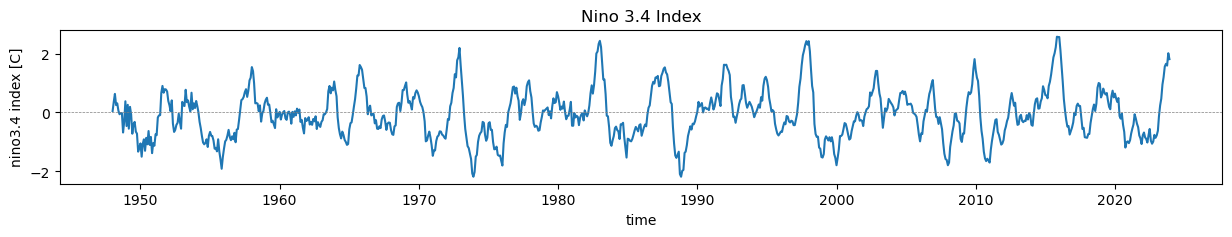

In [14]:
# plot it
fig=plt.figure(figsize=(15,2))
nino.plot()
plt.axhline(y=0,color='grey',linestyle='dashed',linewidth=0.5)
plt.title("Nino 3.4 Index")
plt.show()

## Sea Surface Temperature (SST)

Is 3-dimensional data provided in a netcdf file, so we'll open it with xarray

In [15]:
# get data
ds=xr.open_dataset(sst_f)
ds

<xarray.Dataset> Size: 542MB
Dimensions:  (lat: 180, lon: 360, time: 2091)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 17kB 1850-01-01 1850-02-01 ... 2024-03-01
Data variables:
    sst      (time, lat, lon) float32 542MB ...
Attributes:
    title:            created 12/2013 from data provided by JRA
    history:          Created 12/2012 from data obtained from JRA by ESRL/PSD
    platform:         Analyses
    citation:         Hirahara, S., Ishii, M., and Y. Fukuda,2014: Centennial...
    institution:      NOAA ESRL/PSD
    Conventions:      CF-1.2
    dataset_title:    COBE-SST2 Sea Surface Temperature and Ice
    original_source:  https://climate.mri-jma.go.jp/pub/ocean/cobe-sst2/
    References:       http://www.psl.noaa.gov/data/gridded/cobe2.html

In [16]:
# pull variable from xarray dataset
sst=ds.sst
sst

<xarray.DataArray 'sst' (time: 2091, lat: 180, lon: 360)> Size: 542MB
[135496800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 17kB 1850-01-01 1850-02-01 ... 2024-03-01
Attributes:
    long_name:     Monthly Means of Global Sea Surface Temperature
    valid_range:   [-5. 40.]
    units:         degC
    var_desc:      Sea Surface Temperature
    dataset:       COBE-SST2 Sea Surface Temperature
    statistic:     Mean
    parent_stat:   Individual obs
    level_desc:    Surface
    actual_range:  [-3.0000002 34.392    ]

In [17]:
# reorder latitudes ascending
sst=sst.reindex(lat=sst.lat[::-1])
sst

<xarray.DataArray 'sst' (time: 2091, lat: 180, lon: 360)> Size: 542MB
[135496800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 17kB 1850-01-01 1850-02-01 ... 2024-03-01
Attributes:
    long_name:     Monthly Means of Global Sea Surface Temperature
    valid_range:   [-5. 40.]
    units:         degC
    var_desc:      Sea Surface Temperature
    dataset:       COBE-SST2 Sea Surface Temperature
    statistic:     Mean
    parent_stat:   Individual obs
    level_desc:    Surface
    actual_range:  [-3.0000002 34.392    ]

In [18]:
# subset in time
# sst's time labels already match nino's so we don't need to re-assign time labels, just subset
sst=sst.sel(time=slice(year_start,year_end))
sst

<xarray.DataArray 'sst' (time: 912, lat: 180, lon: 360)> Size: 236MB
[59097600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2023-12-01
Attributes:
    long_name:     Monthly Means of Global Sea Surface Temperature
    valid_range:   [-5. 40.]
    units:         degC
    var_desc:      Sea Surface Temperature
    dataset:       COBE-SST2 Sea Surface Temperature
    statistic:     Mean
    parent_stat:   Individual obs
    level_desc:    Surface
    actual_range:  [-3.0000002 34.392    ]

In [19]:
# change longitudes from 0 to 360 to -180 to 180
# some plotting functions have problems when longitude is 0 to 360

sst.coords['lon']=xr.where(sst.coords['lon']>180,sst.coords['lon']-360,sst.coords['lon'])
sst

<xarray.DataArray 'sst' (time: 912, lat: 180, lon: 360)> Size: 236MB
[59097600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2023-12-01
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... -4.5 -3.5 -2.5 -1.5 -0.5
Attributes:
    long_name:     Monthly Means of Global Sea Surface Temperature
    valid_range:   [-5. 40.]
    units:         degC
    var_desc:      Sea Surface Temperature
    dataset:       COBE-SST2 Sea Surface Temperature
    statistic:     Mean
    parent_stat:   Individual obs
    level_desc:    Surface
    actual_range:  [-3.0000002 34.392    ]

In [20]:
# reorder longitudes so they are ascending
# we'll use roll, sort would also work
roll_len=len(sst.lon)//2
sst=sst.roll(lon=roll_len,roll_coords=True)
sst

<xarray.DataArray 'sst' (time: 912, lat: 180, lon: 360)> Size: 236MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.695    , -1.695    , -1.695    , ..., -1.692    ,
         -1.69     , -1.69     ],
        [-1.6800001, -1.6800001, -1.6800001, ..., -1.6800001,
         -1.6800001, -1.6800001],
        [-1.695    , -1.695    , -1.695    , ..., -1.695    ,
         -1.695    , -1.695    ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.6024995, -1.6024995, -1.6074996, ..., -1.5999995,
         -1.6024995, -1.5999995],
        [-1.5974995, -1.6024995, -1.6024995, ..., -1.5949996,
         -1.5949996, -1.5999995],
        [-1.5999995, -1.5999995, -1.6024995, ..., -1.5949996,
         -1.5974995, -1.5999995]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.6791934, -1.6816934, -1.6816934, ..., -1.6766934,
         -1.6816934, -1.6816934],
        [-1.6616935, -1.6591934, -1.6591934, ..., -1.6591934,
         -1.6616935, -1.6616935],
        [-1.6816934, -1.6816934, -1.6816934, ..., -1.6791934,
         -1.6766934, -1.6791934]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2023-12-01
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    long_name:     Monthly Means of Global Sea Surface Temperature
    valid_range:   [-5. 40.]
    units:         degC
    var_desc:      Sea Surface Temperature
    dataset:       COBE-SST2 Sea Surface Temperature
    statistic:     Mean
    parent_stat:   Individual obs
    level_desc:    Surface
    actual_range:  [-3.0000002 34.392    ]

In [21]:
# calculate anomalies

# first calculate the monthly climatological values (long term means) over the base period
sst_base=sst.sel(time=slice(base_start,base_end))  # subset in time
sst_clim=sst_base.groupby(sst_base.time.dt.month).mean('time')  # long term mean of each month
sst_clim

<xarray.DataArray 'sst' (month: 12, lat: 180, lon: 360)> Size: 3MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.6949998, -1.6945999, -1.6947998, ..., -1.6916335,
         -1.690333 , -1.6902331],
        [-1.6799   , -1.6800002, -1.6800002, ..., -1.6800002,
         -1.6800002, -1.6799   ],
        [-1.6949998, -1.6949998, -1.6949998, ..., -1.6949998,
         -1.6949998, -1.6949998]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.6863003, -1.6869004, -1.6931999, ..., -1.686967 ,
         -1.688367 , -1.6843668],
        [-1.6877   , -1.6903999, -1.6891999, ..., -1.6857669,
         -1.685867 , -1.6886001],
        [-1.6772001, -1.6776332, -1.6805664, ..., -1.6748663,
         -1.6762996, -1.6773334]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.6997005, -1.6997005, -1.6998004, ..., -1.6987336,
         -1.6999004, -1.6997005],
        [-1.6802002, -1.6802002, -1.6800002, ..., -1.6797003,
         -1.6800002, -1.6808   ],
        [-1.6969998, -1.6969998, -1.6971996, ..., -1.6969998,
         -1.6958665, -1.6969998]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     Monthly Means of Global Sea Surface Temperature
    valid_range:   [-5. 40.]
    units:         degC
    var_desc:      Sea Surface Temperature
    dataset:       COBE-SST2 Sea Surface Temperature
    statistic:     Mean
    parent_stat:   Individual obs
    level_desc:    Surface
    actual_range:  [-3.0000002 34.392    ]

In [22]:
# now calculate the anomalies
sst_anom=sst.groupby(sst.time.dt.month) - sst_clim

# assign some variable attributes
sst_anom.attrs['standard_name']='sst anomaly'
sst_anom.attrs['units']='C'
sst_anom

<xarray.DataArray 'sst' (time: 912, lat: 180, lon: 360)> Size: 236MB
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [-2.38418579e-07, -4.00185585e-04, -2.00271606e-04, ...,
         -3.66568565e-04,  3.32951546e-04,  2.33054161e-04],
        [-1.00016594e-04,  1.19209290e-07,  1.19209290e-07, ...,
          1.19209290e-07,  1.19209290e-07, -1.00016594e-04],
        [-2.38418579e-07, -2.38418579e-07, -2.38418579e-07, ...,
         -2.38418579e-07, -2.38418579e-07, -2.38418579e-07]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
          8.69674683e-02,  8.58675241e-02,  8.43672752e-02],
        [ 9.02005434e-02,  8.79004002e-02,  8.67004395e-02, ...,
          9.07673836e-02,  9.08674002e-02,  8.86005163e-02],
        [ 7.72005320e-02,  7.76336193e-02,  7.80669451e-02, ...,
          7.98667669e-02,  7.88000822e-02,  7.73338079e-02]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [ 2.05070972e-02,  1.80070400e-02,  1.81069374e-02, ...,
          2.20401287e-02,  1.82069540e-02,  1.80070400e-02],
        [ 1.85067654e-02,  2.10068226e-02,  2.08067894e-02, ...,
          2.05068588e-02,  1.83067322e-02,  1.91065073e-02],
        [ 1.53063536e-02,  1.53063536e-02,  1.55061483e-02, ...,
          1.78064108e-02,  1.91730261e-02,  1.78064108e-02]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2023-12-01
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    month    (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:  sst anomaly
    units:          C

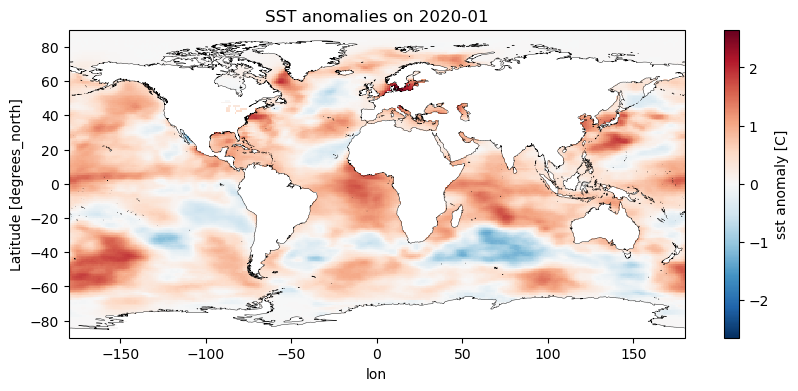

In [23]:
# visually check the anomalies for a single month
ptime='2020-01'

fig=plt.figure(figsize=(10,4))
ax=fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)

sst_anom.sel(time=ptime).plot(ax=ax)
plt.title('SST anomalies on '+ptime)
plt.show()

## Precipitation

Is 3-dimensional data provided in a netcdf file, so we'll open it with xarray

In [24]:
# get data
ds=xr.open_dataset(pr_f)
ds

<xarray.Dataset> Size: 237MB
Dimensions:  (lat: 180, lon: 360, time: 915)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2024-03-01
Data variables:
    precip   (time, lat, lon) float32 237MB ...
Attributes:
    title:          Precipitation Reconstruction over Land (PREC/L): 1.0x1.0
    platform:       Analyses
    institution:    NOAA ESRL/PSD
    citation:       Chen, M., P. Xie, J. E. Janowiak, and P. A. Arkin, 2002: ...
    history:        created 01/2011 by CAS\nConverted to chunked, deflated Ne...
    Conventions:    CF-1.2
    dataset_title:  Precipitation Reconstruction over Land (PREC/L)
    data_modified:  2019-02-25
    References:     http://www.psl.noaa.gov/data/gridded/data.precl.html

In [25]:
# pull variable from xr dataset
pr=ds.precip

# this data's time labels already match nino's so we don't need to re-assign the coordinate labels
# just subset
pr=pr.sel(time=slice(year_start,year_end))

# latitudes ascending
pr=pr.reindex(lat=pr.lat[::-1])

# change longitudes from 0 to 360 to -180 to 180
pr.coords['lon']=xr.where(pr.coords['lon']>180,pr.coords['lon']-360,pr.coords['lon'])
roll_len=len(pr.lon)//2
pr=pr.roll(lon=roll_len,roll_coords=True)

# calculate anomalies
pr_base=pr.sel(time=slice(base_start,base_end)) # subset to base period
pr_clim=pr_base.groupby(pr_base.time.dt.month).mean('time') # monthly climatological values
pr_anom=pr.groupby(pr.time.dt.month) - pr_clim  # anomalies

# assign some variables attributes
pr_anom.attrs['standard_name']='pr anomaly'
pr_anom.attrs['units']='mm/day'

pr_anom

<xarray.DataArray 'precip' (time: 912, lat: 180, lon: 360)> Size: 236MB
array([[[-0.03222221, -0.03348145, -0.0352222 , ..., -0.03262964,
         -0.03214818, -0.03274071],
        [-0.03244448, -0.03274071, -0.03255555, ..., -0.03185186,
         -0.03170368, -0.0313333 ],
        [-0.02059263, -0.02425924, -0.02422217, ..., -0.01929632,
         -0.01925924, -0.01940739],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.14986208, -0.15041378, -0.15006894, ..., -0.14955169,
         -0.14937934, -0.15010345],
        [-0.16562068, -0.16482759, -0.16510338, ..., -0.16427594,
         -0.16486216, -0.1656552 ],
        [-0.17937917, -0.18379313, -0.18331039, ..., -0.17648274,
         -0.17724133, -0.17793107],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.18103449, -0.18179314, -0.1824138 , ..., -0.17944828,
         -0.18037936, -0.18127587],
        [-0.19803445, -0.19831035, -0.19941384, ..., -0.19551724,
         -0.1966207 , -0.19679312],
        [-0.21517237, -0.21558625, -0.2160345 , ..., -0.21286209,
         -0.21344826, -0.2138276 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2023-12-01
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    month    (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:  pr anomaly
    units:          mm/day

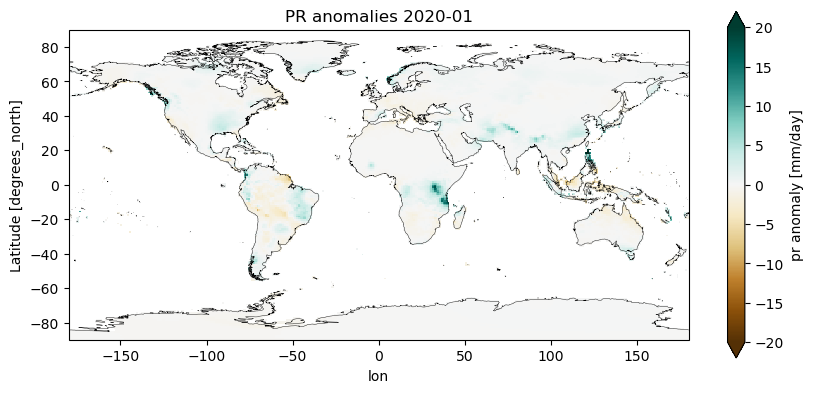

In [26]:
# visually check the anomalies for a single month

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)

pr_anom.sel(time=ptime).plot(vmin=-20,vmax=20,extend='both',cmap='BrBG',cbar_kwargs={'shrink':0.9})
plt.title('PR anomalies '+ptime)
plt.show()

## Temperature

Is 3-dimensional data provided in a netcdf file, so we'll open it with xarray

In [27]:
# get data
ds=xr.open_dataset(t_f)
ds

<xarray.Dataset> Size: 857MB
Dimensions:      (longitude: 360, latitude: 180, time: 3291, month_number: 12)
Coordinates:
  * longitude    (longitude) float32 1kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude     (latitude) float32 720B -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time         (time) float64 26kB 1.75e+03 1.75e+03 ... 2.024e+03 2.024e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 518kB ...
    temperature  (time, latitude, longitude) float32 853MB ...
    climatology  (month_number, latitude, longitude) float32 3MB ...
Attributes:
    Conventions:          Berkeley Earth Internal Convention (based on CF-1.5)
    title:                Gridded Berkeley Earth Surface Temperature Anomaly ...
    history:              07-Apr-2024 18:59:45
    institution:          Berkeley Earth Surface Temperature Project
    source_file:          Complete_TAVG.50719s.20240407T184706.mat
    source_history:       05-Apr-2024 15:18:58
    source_code_version:  eead777c589734c11a431a21725e06d3
    comment:              This file contains surface temperature anomaly fiel...

There are a lot of things that are different about this data file compared to the others
- it is provided as anomalies using base period 1951-1980
- it has multiple data variables in the file
- it has an extra dimension due to the climatology variable included in the file
- the latitude and longitude dimension names (vs lat and lon)
- the longitudes are -180 to 180 already
- the latitudes are sorted ascending already
- the time coordinate is given as float values instead of datetimes

In [28]:
# replace whacky float times with datetimes to match the other datasets
dates=pd.date_range('1750-01-01','2024-03-01',freq='MS')
ds['time']=dates

# we also need to rename the dimension 'month_number' for groupby to work correctly (groupby likes the label 'month')
# and so we don't trip up later we'll rename latitude longitude to lat and lon like the other datasets
ds=ds.rename({'month_number':'month','latitude':'lat','longitude':'lon'})
ds

<xarray.Dataset> Size: 857MB
Dimensions:      (lon: 360, lat: 180, time: 3291, month: 12)
Coordinates:
  * lon          (lon) float32 1kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat          (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) datetime64[ns] 26kB 1750-01-01 1750-02-01 ... 2024-03-01
Dimensions without coordinates: month
Data variables:
    land_mask    (lat, lon) float64 518kB ...
    temperature  (time, lat, lon) float32 853MB ...
    climatology  (month, lat, lon) float32 3MB ...
Attributes:
    Conventions:          Berkeley Earth Internal Convention (based on CF-1.5)
    title:                Gridded Berkeley Earth Surface Temperature Anomaly ...
    history:              07-Apr-2024 18:59:45
    institution:          Berkeley Earth Surface Temperature Project
    source_file:          Complete_TAVG.50719s.20240407T184706.mat
    source_history:       05-Apr-2024 15:18:58
    source_code_version:  eead777c589734c11a431a21725e06d3
    comment:              This file contains surface temperature anomaly fiel...

this data is provided as anomalies using the base period 1951-1980, we'll change the base period to match the rest of our data

In [29]:
# change base period

# pull variables from xr dataset
t_anom_5180=ds.temperature
clim_5180=ds.climatology

# create temperature values: anomalies plus climatology
t=t_anom_5180.groupby(t_anom_5180.time.dt.month)+clim_5180

# calculate climatological values on new base period
t_base=t.sel(time=slice(base_start,base_end))  # subset in time
clim_8110 = t_base.groupby(t_base.time.dt.month).mean('time')  # long term means for each month

# calculate anomalies with new base period
t_anom=t.groupby(t.time.dt.month)-clim_8110

# subset in time to match other datasets
t_anom=t_anom.sel(time=slice(year_start,year_end))

# assign some variable attributes
t_anom=t_anom.rename('tavg')
t_anom.attrs['standard_name']='T anomaly'
t_anom.attrs['units']='C'

t_anom

<xarray.DataArray 'tavg' (time: 912, lat: 180, lon: 360)> Size: 236MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.82476044, -0.82307625, -0.82136726, ..., -0.8296833 ,
         -0.8280659 , -0.82642174],
        [-0.9759979 , -0.97014046, -0.96421814, ..., -0.99312973,
         -0.9874916 , -0.9817829 ],
        [-1.1317635 , -1.1211376 , -1.1103897 , ..., -1.1628838 ,
         -1.1526432 , -1.1422672 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2023-12-01
    month    (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:  T anomaly
    units:          C

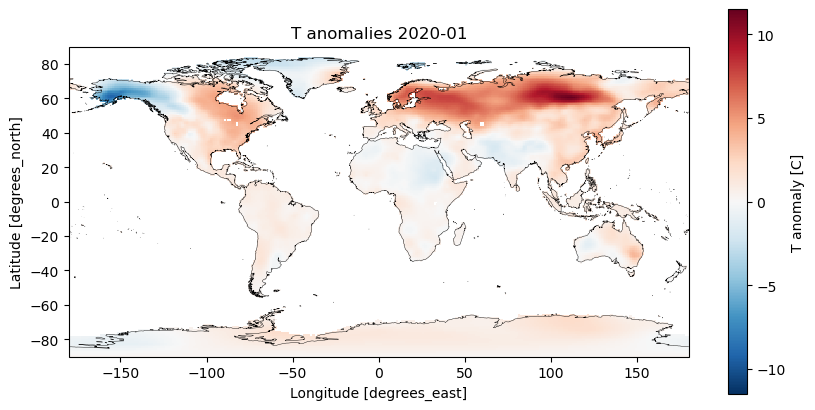

In [30]:
# visually check the anomalies for a single month

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)

t_anom.sel(time=ptime).plot()
plt.title('T anomalies '+ptime)
plt.show()

We're now ready to start our analysis with the variables `nino`, `sst_anom`, `pr_anom`, and `t_anom`

Let's double check our 4 variable shapes below: 

In [31]:
# look at data shapes
nino.shape, sst_anom.shape, pr_anom.shape, t_anom.shape

((912,), (912, 180, 360), (912, 180, 360), (912, 180, 360))

In [32]:
# check first and last time is the same for all data
# another way to do this would be with assert statements or with numpy.testing

variables=[nino, sst_anom, pr_anom, t_anom] # list of arrays

for var in variables:
    print(var.name, var.time[0].data,var.time[-1].data)

nino 1948-01-01T00:00:00.000000000 2023-12-01T00:00:00.000000000
sst 1948-01-01T00:00:00.000000000 2023-12-01T00:00:00.000000000
precip 1948-01-01T00:00:00.000000000 2023-12-01T00:00:00.000000000
tavg 1948-01-01T00:00:00.000000000 2023-12-01T00:00:00.000000000


In [33]:
# clean up 
del ds, nino_raw, pr, pr_base, pr_clim, sst, sst_base, sst_clim, t, t_anom_5180, t_base

# Begin Main Analysis

## 1) How many strong El Nino and La Nina events have occurred from 1948 to 2023? 

The answer to this question, of course, depends on how we define strong ENSO events.

There are multiple methods for identifying ENSO events. We will use the following criteria to identify strong events:
- Input data: Nino 3.4 Index 5-month centered running mean
- Criteria: 5 consecutive months exceeding the threshold value
- Threshold: +/- 0.6 C

In [34]:
# constants based on our criteria
nmonths=5
event_thresh=0.6

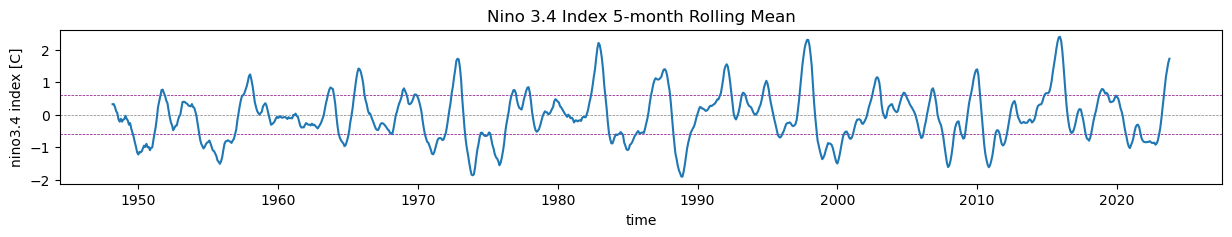

In [35]:
# first calculate the 5-month rolling mean
nino_rollmean=nino.rolling(time=nmonths,center=True).mean()

# plot it
fig=plt.figure(figsize=(15,2))
plt.axhline(y = -event_thresh, color='purple', linestyle='dashed', linewidth=0.5) # nina threshold
plt.axhline(y = 0,color='grey', linestyle='dashed', linewidth=0.5)  # zero reference line
plt.axhline(y = event_thresh, color='purple', linestyle='dashed', linewidth=0.5)  # nino threshold

nino_rollmean.plot()
plt.title("Nino 3.4 Index 5-month Rolling Mean")
plt.show()

Anywhere the nino3.4 rolling mean (blue line) exceeds the thresholds (purple lines) is potentially an ENSO event. To identify which peaks and valleys in the timeseries qualify as ENSO events we need to identify where the thresholds are exceeded for at least 5 consecutive months.  

We'll use a for loop to identify ENSO events in the timeseries and mark months 
- during an El Nino event with +1
- during a La Nina event with -1 

In [36]:
# create an array to hold our results and initialize to nan
# this array is where we will fill values with +1,-1
nino_events=nino_rollmean.copy() 
nino_events[:]=np.nan

# look at the first few values, should be all nan
nino_events[0:4]

<xarray.DataArray 'nino' (time: 4)> Size: 32B
array([nan, nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 32B 1948-01-01 1948-02-01 ... 1948-04-01
Attributes:
    standard_name:  nino3.4 index
    units:          C

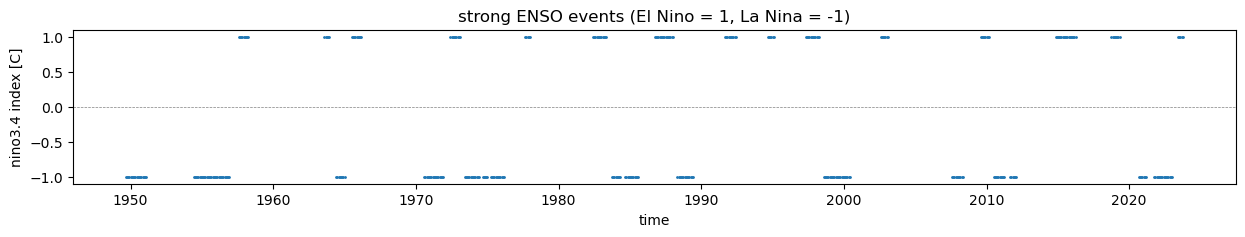

In [37]:
# now loop through months and fill +1, -1 for windows of 5 months that meet our criteria

for i,value in enumerate(nino_rollmean):
    # La Nina conditions
    if  value < -event_thresh:
        # possible La Nina conditions, look forward 4 more months
        window=nino_rollmean[i:i+nmonths]
        if all(window < -event_thresh):
            nino_events[i:i+nmonths] = -1

    # El Nino conditions
    if  value > event_thresh:
        # possible El Nino conditions, look forward 4 more months
        window=nino_rollmean[i:i+nmonths]
        if all(window > event_thresh):
            nino_events[i:i+nmonths]=1     
            
# plot it
fig=plt.figure(figsize=(15,2))
plt.axhline(y = 0, color='grey', linestyle='dashed', linewidth=0.5)  # zero reference line
nino_events.plot(linestyle='None', marker='o', markersize=1)
plt.title("strong ENSO events (El Nino = 1, La Nina = -1)")
plt.show()            

Above we have identified all the periods that meet our criteria, but this plot isn't too nice to look at.

Let's use the `nino_events` array to add shading to the nino_rollmean plot as well as count how many el nino and la nina events there are in the timeseries. To do this we'll need to find where each ENSO event starts and ends. For this we've written a custom function.

In [38]:
def get_event_bounds(event_array,event_id):
    '''
    this function accepts a 1D xr data array of categorical data values with dim 'time' of datetimes and an 
    integer value representing the category to search for. it returns the beginning and ending datetimes for
    each span of consecutive occurrences for a single categorical value  
    
    Parameters:
    event_array: the 1D xr data array of categorical data values with dim 'time' of datetimes
    event_id: the categorical data value to use
    
    Returns:
    bounds: a list of datetime tuples [(starting dateime, ending datetime), ...]
    '''
    
    bounds=[] # empty list to hold the results
    start_flag=False # flag for identifying the start of an event
    istart=0  # index of the event start, initialized to zero
    iend=0    # index of the event end, initialized to zero
    
    for i,val in enumerate(event_array[:-1]):    
        # find each event start
        if (val==event_id) and (start_flag==False):
            istart=i
            start_flag=True
        # find each event end, save start/end times to a list, reset istart iend to zero
        if (start_flag) and (iend==0) and (event_array[i+1]!=event_id):
            iend=i
            # append a tuple (event start time, event end time) to our list of results
            start_time=event_array.time[istart].dt.strftime('%Y-%m-%d')
            end_time=event_array.time[iend].dt.strftime('%Y-%m-%d')
            bounds.append((start_time.data,end_time.data))
            # reset values so we can look for the next event
            start_flag=False
            iend=0
    return bounds

In [39]:
# call our function
nino_bounds=get_event_bounds(nino_events,1)
nina_bounds=get_event_bounds(nino_events,-1)

# look at the first few results in the list
for tup in nino_bounds[0:3]:
    print(tup)

(array('1957-08-01', dtype=object), array('1958-04-01', dtype=object))
(array('1963-08-01', dtype=object), array('1963-12-01', dtype=object))
(array('1965-07-01', dtype=object), array('1966-03-01', dtype=object))


In [40]:
# take a quick look at two ways to iterate through our list of tuples

# the loop variable "tup" is each item (a tuple) from the list nino_bounds
for tup in nino_bounds[0:3]:
    print(tup, tup[0], tup[1]) # print the tuple and then each value inside the tuple

print('---------------------------------')

# we can access the contents of each tuple directly by using two loop variables val1 and val2
for val1,val2 in nino_bounds[0:3]:
    print(val1,val2)


(array('1957-08-01', dtype=object), array('1958-04-01', dtype=object)) 1957-08-01 1958-04-01
(array('1963-08-01', dtype=object), array('1963-12-01', dtype=object)) 1963-08-01 1963-12-01
(array('1965-07-01', dtype=object), array('1966-03-01', dtype=object)) 1965-07-01 1966-03-01
---------------------------------
1957-08-01 1958-04-01
1963-08-01 1963-12-01
1965-07-01 1966-03-01


Now we have 2 lists `nino_bounds` and `nina_bounds` containing tuples of the start and end datetime for each event. 

The length of each list will tell us how many el nino and la nina events we found in the time series 

In [41]:
print('How many strong el nino and la nina events occurred from 1948 to 2023?')
print(len(nino_bounds),'strong el nino events')
print(len(nina_bounds),'strong la nina events') 

How many strong el nino and la nina events occurred from 1948 to 2023?
15 strong el nino events
16 strong la nina events


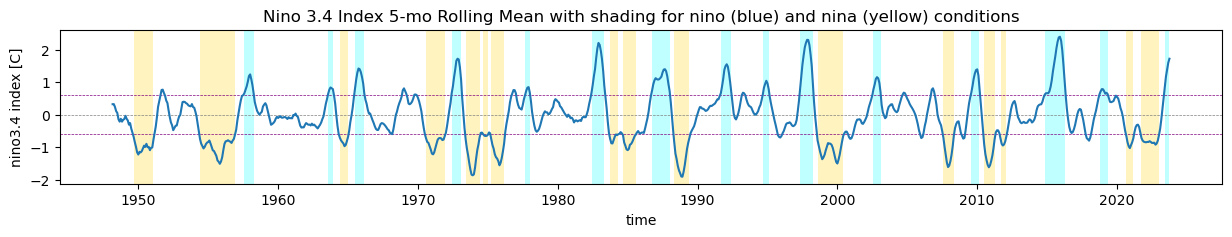

In [42]:
# plot the Nino 3.4 rolling mean with shading during strong el nino and la nina conditions

fig=plt.figure(figsize=(15,2))

# horizontal guide lines
plt.axhline(y=-event_thresh,color='purple',linestyle='dashed',linewidth=0.5) # nina threshold
plt.axhline(y=0,color='grey',linestyle='dashed',linewidth=0.5)  # zero guideline
plt.axhline(y=event_thresh,color='purple',linestyle='dashed',linewidth=0.5)  # nino threshold

# plot the rolling mean timeseries with title
nino_rollmean.plot()
plt.title("Nino 3.4 Index 5-mo Rolling Mean with shading for nino (blue) and nina (yellow) conditions")

# add blue shading during nino events
for tstart,tend in nino_bounds:
    plt.axvspan(tstart, tend, color='cyan', alpha=0.25, lw=0)

# add yellow shading during nina events    
for tstart,tend in nina_bounds:
    plt.axvspan(tstart, tend, color='gold', alpha=0.25, lw=0)

plt.show()

## 2) Using composite analysis, what pattern do we see in sea surface temperature during El Nino and La Nina conditions? What is the approximate magnitude of the equatorial Pacific SST anomaly during these conditions?

Remember, our array of sea surface temperature anomalies is called `sst_anom` and we've identified strong el nino and la nina periods in the array called `nino_events`

Our composites will be the time-mean of a group of SST anomaly maps for different months. 

We'll make a composite of SST anomalies for months with el nino conditions and another composite of SST anomalies for months with la nina conditions. 

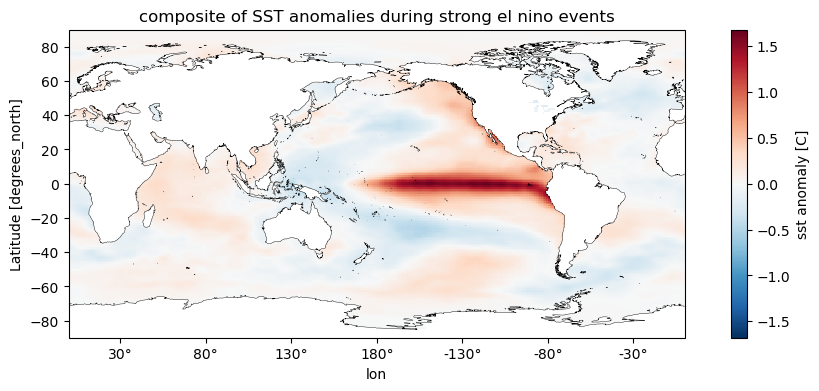

In [43]:
# el nino composite

# keep sst anomalies only for months during el nino events, then average in time
sst_nino_composite=sst_anom.where(nino_events==1).mean('time',keep_attrs=True)

# set up the plot centered over the Pacific
fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
ax.xaxis.set_visible(True)  # show lons
ax.yaxis.set_visible(True)  # show lats

# correct tick labels for lon
lon_formatter = LongitudeFormatter(direction_label=False)
ax.xaxis.set_major_formatter(lon_formatter) 

# plot the composite
sst_nino_composite.plot(cmap='RdBu_r',transform=ccrs.PlateCarree())
plt.title('composite of SST anomalies during strong el nino events')
plt.show()

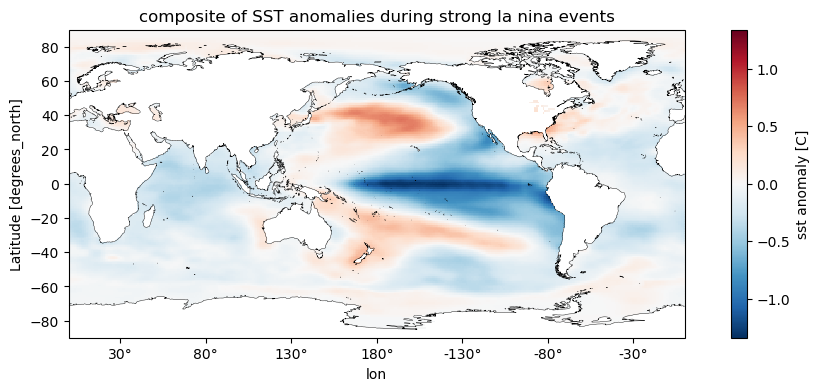

In [44]:
# la nina composite

# keep sst anomalies only for months during la nina events, then average in time
sst_nina_composite=sst_anom.where(nino_events==-1).mean('time',keep_attrs=True)

# set up the plot centered over the Pacific
fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
ax.xaxis.set_visible(True) # show lons
ax.yaxis.set_visible(True) # show lats

# correct tick labels for lon
lon_formatter = LongitudeFormatter(direction_label=False)
ax.xaxis.set_major_formatter(lon_formatter)

# plot the composite
sst_nina_composite.plot(cmap='RdBu_r',transform=ccrs.PlateCarree())
plt.title('composite of SST anomalies during strong la nina events')
plt.show()

To get the approximate magnitude of the el nino and la nina SST anomalies in the equatorial pacific, we can just eyeball the colorbar on the composite maps. Or, do a quick min max on a selection of latitudes and longitudes in the tropical pacific.

In [45]:
# define the limits of a box over the tropical pacific
latS = -3
latN = 3
lonW = -170
lonE = -100

# get the min and max values of the composites inside the box, rounded to one decimal
nino_range = ( round(sst_nino_composite.sel(lat=slice(latS,latN),lon=slice(lonW,lonE)).min().item(), 1),
               round(sst_nino_composite.sel(lat=slice(latS,latN),lon=slice(lonW,lonE)).max().item(), 1) )

nina_range = ( round(sst_nina_composite.sel(lat=slice(latS,latN),lon=slice(lonW,lonE)).max().item(), 1),
                round(sst_nina_composite.sel(lat=slice(latS,latN),lon=slice(lonW,lonE)).min().item(), 1) )

print(f'the equatorial pacific anomalies in the el nino composite range from about {nino_range}')
print(f'the equatorial pacific anomalies in the la nina composite range from about {nina_range}')

the equatorial pacific anomalies in the el nino composite range from about (0.9, 1.7)
the equatorial pacific anomalies in the la nina composite range from about (-0.7, -1.3)


## 3) Using composite analysis, where do strong El Nino and La Nina conditions during boreal winter (DJF) have a statistically significant relationship with winter temperature and precipitation globally?

We'll use our `nino_events` array to select months from our temperature and precipitation data `t_anom` and `pr_anom` for making composites. 

To determine statistical significance, we'll use a t-test for difference in means between two data samples. For temperature and precipitation separately, we'll test significance between the following data samples:
- **sample 1:** winter months during strong el nino conditions, **sample 2:** all other winter months
- **sample 1:** winter months during strong la nina conditions, **sample 2:** all other winter months

In [46]:
# starting with el nino conditions, temperature
# get temperature anomalies only for times during strong el nino conditions

t_nino=t_anom.where(nino_events==1,drop=True)
t_nino

<xarray.DataArray 'tavg' (time: 139, lat: 180, lon: 360)> Size: 36MB
array([[[ 0.1919899 ,  0.19262695,  0.19319916, ...,  0.18967438,
          0.19051361,  0.19127655],
        [ 0.606781  ,  0.6092682 ,  0.61156464, ...,  0.59820557,
          0.6012535 ,  0.6041107 ],
        [ 0.9851494 ,  0.9904442 ,  0.9955063 , ...,  0.9679718 ,
          0.9739075 ,  0.9796295 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-2.208355  , -2.207161  , -2.2060127 , ..., -2.212307  ,
         -2.2109375 , -2.2096252 ],
        [-1.803585  , -1.7999    , -1.7964096 , ..., -1.8157768 ,
         -1.8115273 , -1.8074646 ],
        [-1.3988152 , -1.3928032 , -1.3870964 , ..., -1.4185486 ,
         -1.4116821 , -1.4050941 ],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.46574783, -0.46666718, -0.46751404, ..., -0.4626274 ,
         -0.46372986, -0.4647751 ],
        [-0.8620033 , -0.8645477 , -0.8669052 , ..., -0.8532982 ,
         -0.85637665, -0.8592758 ],
        [-1.2185822 , -1.2229156 , -1.2270584 , ..., -1.2043343 ,
         -1.2092819 , -1.2140198 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 1kB 1957-08-01 1957-09-01 ... 2023-10-01
    month    (time) int64 1kB 8 9 10 11 12 1 2 3 4 8 9 ... 1 2 3 4 5 6 7 8 9 10
Attributes:
    standard_name:  T anomaly
    units:          C

In [47]:
# now separate out winter DJF months
# this is sample 1: winter months during strong el nino conditions

t_nino_DJF=t_nino.groupby(t_nino.time.dt.season)['DJF'] 

In [48]:
# make a composite
t_nino_DJF_composite=t_nino_DJF.mean('time',keep_attrs=True)

In [49]:
# do the same for precipitation
pr_nino=pr_anom.where(nino_events==1,drop=True) # all nino precip
pr_nino_DJF=pr_nino.groupby(pr_nino.time.dt.season)['DJF'] # sample 1: winter months during strong el nino conditions
pr_nino_DJF_composite=pr_nino_DJF.mean('time',keep_attrs=True) # make composite

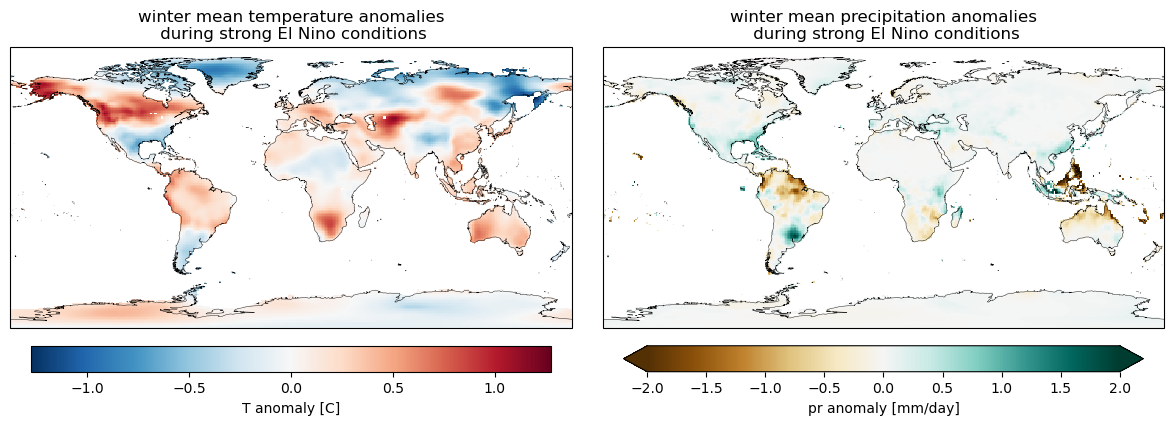

In [50]:
# plot el nino composites, don't worry about statistical significance yet

fig=plt.figure(figsize=(12,4))

ax=fig.add_subplot(121,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
t_nino_DJF_composite.plot(cmap='RdBu_r',cbar_kwargs={'shrink':0.9,'orientation':'horizontal','pad':0.05})
plt.title('winter mean temperature anomalies\n during strong El Nino conditions')

ax=fig.add_subplot(122,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
pr_nino_DJF_composite.plot(vmin=-2, vmax=2, extend='both',cmap='BrBG',cbar_kwargs={'shrink':0.9,'orientation':'horizontal','pad':0.05})
plt.title('winter mean precipitation anomalies\n during strong El Nino conditions')

plt.tight_layout()
plt.show()

**Where are the above anomalies statistically significant?**   

We need to create sample 2 for temperature and precipitation, then apply our test statistic comparing sample 1 to sample2.

In [51]:
# create a t and pr samples that include all winter months DJF when there are not strong el nino conditions

# all months that don't fall in strong nino events
t_other=t_anom.where(nino_events!=1,drop=True) 

# pull out just DJF months
t_other_DJF=t_other.groupby(t_other.time.dt.season)['DJF'] # this is sample 2: all winter months that are NOT during strong el nino conditions

# same for precip
pr_other=pr_anom.where(nino_events!=1,drop=True)
pr_other_DJF=pr_other.groupby(pr_other.time.dt.season)['DJF']  # this is sample 2: all winter months that are NOT during strong el nino conditions

# look at how many months of data are included in each sample
print('t nino and non-nino sample sizes:',t_nino_DJF.shape[0],t_other_DJF.shape[0]) 
print('pr nino and non-nino data sample sizes:',pr_nino_DJF.shape[0],pr_other_DJF.shape[0]) 

t nino and non-nino sample sizes: 44 184
pr nino and non-nino data sample sizes: 44 184


Scipy has a function that will calculate the t-test for difference in means between two data samples **[scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)**

This function can accept xarray data array inputs. We'll test sample 1 = `t_nino_DJF` vs sample 2 = `t_other_DJF` as well as sample 1 = `pr_nino_DJF` vs sample 2 = `pr_other_DJF`. 

Notice that scipy.stats.ttest_ind will return an object with numpy arrays attached. You can access the returned data like `result.pvalue`, `result.statistic`, `result.df`. 

For easy of plotting it's a good idea to convert the numpy result back to xarray.

In [52]:
# t-test for difference in means 
t_sigtest = ss.ttest_ind(t_nino_DJF, t_other_DJF, axis=0, equal_var=False)

# numpy --> xarray
t_nino_pval = xr.DataArray(t_sigtest.pvalue, coords={'lat':('lat',t_nino.coords['lat'].data),'lon':('lon',t_nino.coords['lon'].data)})  

# same thing for pr
pr_sigtest=ss.ttest_ind(pr_nino_DJF,pr_other_DJF,axis=0,equal_var=False)
pr_nino_pval=xr.DataArray(pr_sigtest.pvalue, coords={'lat':('lat',pr_nino.coords['lat'].data),'lon':('lon',pr_nino.coords['lon'].data)})  

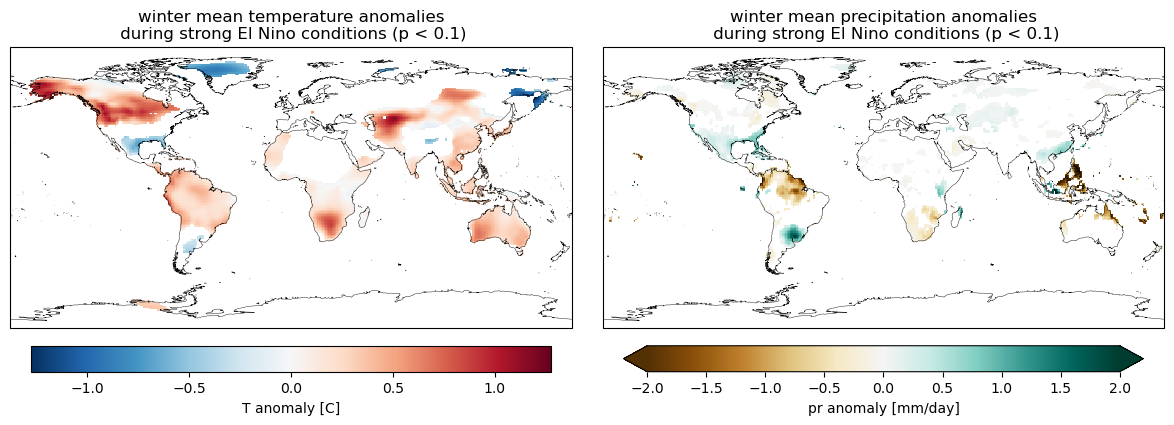

In [53]:
# make the same plot as above but only show the results where pval < 0.1
pval=0.1

fig=plt.figure(figsize=(12,4))

ax=fig.add_subplot(121,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
t_nino_DJF_composite.where(t_nino_pval<pval).plot(cmap='RdBu_r',cbar_kwargs={'shrink':0.9,'orientation':'horizontal','pad':0.05})
plt.title(f'winter mean temperature anomalies\n during strong El Nino conditions (p < {pval})')

ax=fig.add_subplot(122,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
pr_nino_DJF_composite.where(pr_nino_pval<pval).plot(vmin=-2, vmax=2, extend='both',cmap='BrBG',cbar_kwargs={'shrink':0.9,'orientation':'horizontal','pad':0.05})
plt.title(f'winter mean precipitation anomalies\n during strong El Nino conditions (p < {pval})')

plt.tight_layout()
plt.show()

**repeat the above for la nina conditions**

In [54]:
# la nina

# create sample 1's and composites
# temperature
t_nina = t_anom.where(nino_events == -1,drop=True) # t during strong la nina
t_nina_DJF = t_nina.groupby(t_nina.time.dt.season)['DJF']  # sample 1: winter months during strong nina
t_nina_DJF_composite = t_nina_DJF.mean('time',keep_attrs=True) # make composite
# precipitation
pr_nina = pr_anom.where(nino_events == -1,drop=True) # pr during strong la nina
pr_nina_DJF = pr_nina.groupby(pr_nina.time.dt.season)['DJF'] # sample 1: winter months during strong nina
pr_nina_DJF_composite = pr_nina_DJF.mean('time',keep_attrs=True) # make composite

# create sample 2's
t_other = t_anom.where(nino_events != -1,drop=True) # all months that are NOT strong nina
t_other_DJF = t_other.groupby(t_other.time.dt.season)['DJF'] # sample 2: all winter months that are NOT during strong nina
pr_other = pr_anom.where(nino_events != -1,drop=True) # all months that are NOT strong nina
pr_other_DJF = pr_other.groupby(pr_other.time.dt.season)['DJF']  # sample 2: all winter months that are NOT during strong nina

# look at how many months of data are included in each sample
print('t nina and non-nina sample sizes:',t_nina_DJF.shape[0],t_other_DJF.shape[0]) 
print('pr nina and non-nina data sample sizes:',pr_nina_DJF.shape[0],pr_other_DJF.shape[0]) 

# statistical significance
t_sigtest = ss.ttest_ind(t_nina_DJF, t_other_DJF, axis=0, equal_var=False) # t-test for difference in means 
t_nina_pval = xr.DataArray(t_sigtest.pvalue, 
                      coords={'lat':('lat',t_nino.coords['lat'].data),
                              'lon':('lon',t_nino.coords['lon'].data)})  # numpy --> xarray

pr_sigtest=ss.ttest_ind(pr_nina_DJF, pr_other_DJF, axis=0, equal_var=False) # t-test for difference in mean
pr_nina_pval=xr.DataArray(pr_sigtest.pvalue, 
                     coords={'lat':('lat',pr_nino.coords['lat'].data),
                             'lon':('lon',pr_nino.coords['lon'].data)})  # numpy --> xarray

t nina and non-nina sample sizes: 59 169
pr nina and non-nina data sample sizes: 59 169


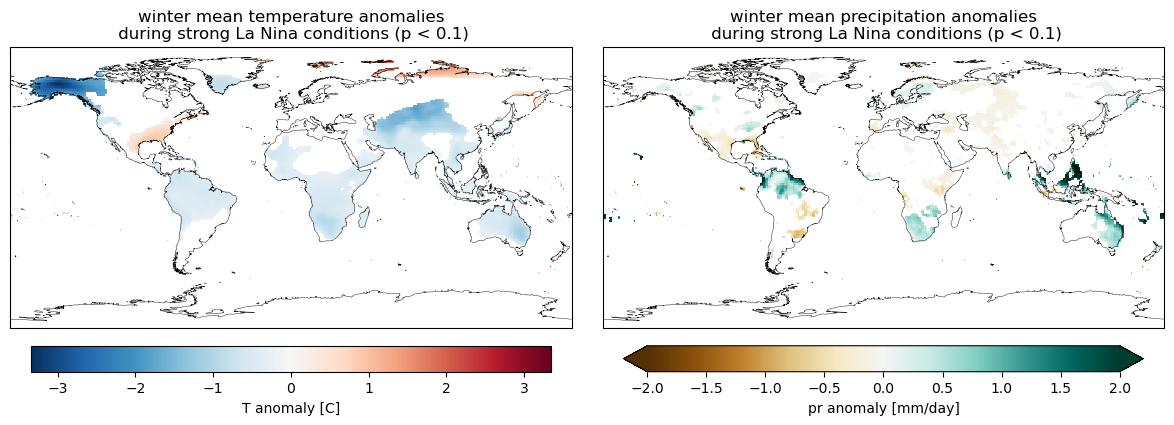

In [55]:
# plot la nina results

fig=plt.figure(figsize=(12,4))

ax=fig.add_subplot(121,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
t_nina_DJF_composite.where(t_nina_pval<pval).plot(cmap='RdBu_r',cbar_kwargs={'shrink':0.9,'orientation':'horizontal','pad':0.05})
plt.title(f'winter mean temperature anomalies\n during strong La Nina conditions (p < {pval})')

ax=fig.add_subplot(122,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
pr_nina_DJF_composite.where(pr_nina_pval<pval).plot(vmin=-2, vmax=2, extend='both',cmap='BrBG',cbar_kwargs={'shrink':0.9,'orientation':'horizontal','pad':0.05})
plt.title(f'winter mean precipitation anomalies\n during strong La Nina conditions (p < {pval})')

plt.tight_layout()
plt.show()

## 4) Do the spatial patterns of anomalous temperature and precipitation during strong EL Nino and strong La Nina look similar? What is similar and different?

We've already calculated everything we need (our composites). We'll make one big plot to visually compare the following global patterns:
- el nino temperature to la nina temperature (are all the areas impacted by el nino also impacted by la nina?)
- el nino precip to la nina precip (are all the areas impacted by el nino also impacted by la nina?)
- el nino temperature to el nino precip (are all the warmer areas also drier and cooler areas also wetter?)
- la nina temperature to la nina precip (are all the warmer areas also drier and cooler areas also wetter?)

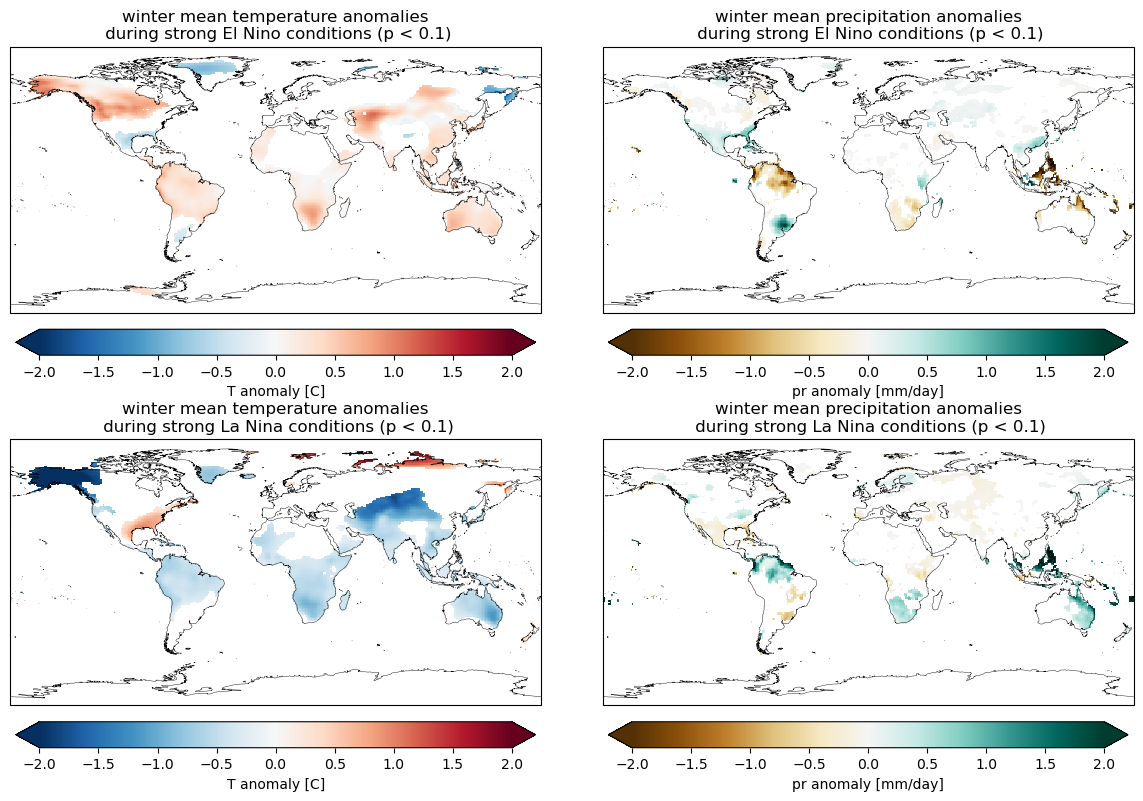

In [56]:
fig=plt.figure(figsize=(12,8))

# t el nino
ax=fig.add_subplot(221,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
t_nino_DJF_composite.where(t_nino_pval<pval).plot(vmin=-2, vmax=2, extend='both',cmap='RdBu_r',cbar_kwargs={'shrink':0.9,'orientation':'horizontal','pad':0.05})
plt.title(f'winter mean temperature anomalies\n during strong El Nino conditions (p < {pval})')

# pr el nino
ax=fig.add_subplot(222,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
pr_nino_DJF_composite.where(pr_nino_pval<pval).plot(vmin=-2, vmax=2, extend='both',cmap='BrBG',cbar_kwargs={'shrink':0.9,'orientation':'horizontal','pad':0.05})
plt.title(f'winter mean precipitation anomalies\n during strong El Nino conditions (p < {pval})')

# t la nina
ax=fig.add_subplot(223,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
t_nina_DJF_composite.where(t_nina_pval<pval).plot(vmin=-2, vmax=2, extend='both',cmap='RdBu_r',cbar_kwargs={'shrink':0.9,'orientation':'horizontal','pad':0.05})
plt.title(f'winter mean temperature anomalies\n during strong La Nina conditions (p < {pval})')

# pr la nina
ax=fig.add_subplot(224,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
pr_nina_DJF_composite.where(pr_nina_pval<pval).plot(vmin=-2, vmax=2, extend='both',cmap='BrBG',cbar_kwargs={'shrink':0.9,'orientation':'horizontal','pad':0.05})
plt.title(f'winter mean precipitation anomalies\n during strong La Nina conditions (p < {pval})')

plt.tight_layout()
plt.show()

**Answers:**

**el nino temperature to la nina temperature** (are all the areas impacted by el nino also impacted by la nina?)

Often we can see the opposite anomaly during El Nino vs La Nina conditions. Look at, for example, Alaska and northern South America where it is warmer during El Nino and cooler during La Nina. This isn't always true though. Look at, for example, central Canada into the nothern United States where we can see a warm anomaly during El Nino but no significant anomaly during La Nina. And, of course, the exact spatial extent and magnitude of the anomalies during El Nino vs La Nina conditions may not be the same for any given region either.

**el nino precip to la nina precip** (are all the areas impacted by el nino also impacted by la nina?)

We often observe opposite precipitation anomalies during El Nino vs La Nina conditions too, but of course, as in the answer above, the patterns aren't perfectly opposite.

**el nino temperature to el nino precip** (are all the warmer areas also drier and cooler areas also wetter?)

We can see many locations that are both warmer and drier during El Nino conditions (northern South America, southern Africa, Philippines, Indonesia) and locations that are both cooler and wetter during El Nino conditions (southern USA, Argentina/Uruguay). But, the temperature anomalies cover more spatial extent than the precip anomalies do, thus, many areas experience warmer but not necessarily drier anomalies (Alaska, much of South America, Australia) and vice versa. There are also some areas that experience warmer/wetter anomalies (southeastern China, Uzbekistan) during El Nino conditions.

**la nina temperature to la nina precip** (are all the warmer areas also drier and cooler areas also wetter?)

The previous answer applies here as well.

## 5) Where, globally, is there a statistically significant correlation between the winter mean (DJF) nino3.4 index and winter mean temperature and precipitation?

This is another statistical way to get at similar information that we found through composite analysis.

In this case we'll compare the entire timeseries of DJF mean nino3.4 index values to the entire timeseries of DJF mean temperature and precipitation at each grid cell of our data.

We usually detrend our data before this type of analysis.

Why detrend?

What we are really interested in here is how the ENSO cycle (3-7 years) of climate variability correlates to precipitation or temperature anomalies, globally. Often, especially with variables like temperature, the factor that explains the most variance in the data timeseries will be the long term trend, aka the "climate change signal". In this case, we don't care about the climate change signal, so we'll detrend our data by removing the long term linear trend from the nino3.4 index as well as from the timeseries or pr and temperature at each grid cell globally. 

There are plenty of other ways to detrend a timeseries that we won't cover here. How do you know which method to choose? Firstly, it depends on what data you are working with and what you are trying to ascertain from the correlation. My first step is to look at what's being done in similar scientific literature and, of course, test multiple methods to ensure the results are robust. 

So, does removing the linear trend mean that the remaining variance in our timeseries will only be due to the ENSO cycle? No! We can think about our timeseries as being composed of a trend, seasonality, and noise. After detrending, we'll be left with "seasonality" which will be a combination of all other forms/frequencies of cyclical natural climate variability (including ENSO) as well as the noise. For your own research, you may want to use a different detrend method or apply additional "filters" to further isolate the variance you are interested in. Or not! It's all very analysis-specific.

We should note that after detrending, ENSO is the often the largest mode of global climate variability. If you are familiar with principal component analysis (PCA) or empirical orthogonal function analysis (EOF), for example, the first principle component of detrended deseasonalized global sea surface temperature reveals a clear ENSO spatial pattern when regressed back onto SST. We won't cover PCA/EOF analysis here but if you are interested in learning a little bit more here are some links 
- [an example of a PCA/EOF analysis on SST showing the first 6 modes of variability and providing a physical interpration of the spatial patterns](https://www.mbari.org/data/global-modes-of-sea-surface-temperature/)
- [a warning about physical interpretations of PCA/EOF results](https://climatedataguide.ucar.edu/climate-tools/empirical-orthogonal-function-eof-analysis-and-rotated-eof-analysis)
- see also the [Collection of Useful Links](#Collection-of-Useful-Links) section which has links to two climate science statistics textbooks
 
Here, we'll keep it simple by using a linear detrend since we've already covered that in a previous workshop day and because it's a frequently used method in the scientific literature. As you know, some areas of the world have experienced greater climate changes than other areas of the world. We'll detrend each grid cell globally. For areas with large trends, larger adjustments to the timeseries will occur when we remove these trends. For areas with small trends, hardly any adjustment to the timeseries will occur when we remove these trends. Then when we do the timeseries correlation at each grid point we won't need to worry about whether the result at one grid cell vs another is influenced more by any prevalent long term linear trend, because we removed it. 

In [57]:
# calculating seasonal means

# use resample: monthly data --> seasonal means 
# 'QS-DEC' means group months like DJF,MAM,JJA,SON and make the time label at the 'quarter start'
# .thin({'time':4}) will pull out every 4th value in the resulting array (all the DJF values)
# .isel(time=slice(1,-1)) will drop the first and last values of the resulting array (1947-12-01 and 2023-12-01), which were created with less than 3 months of data

# nino3.4 index
# this method of indexing [0::4][1:-1] works because this array is 1D
ninoDJF=nino.resample(time='QS-DEC').mean('time')[0::4][1:-1] 

# precipitation anomalies
pr_anomDJF=pr_anom.resample(time='QS-DEC').mean('time').thin({'time':4})
pr_anomDJF=pr_anomDJF.isel(time=slice(1,-1))

# temperature anomalies
t_anomDJF=t_anom.resample(time='QS-DEC').mean('time').thin({'time':4})
t_anomDJF=t_anomDJF.isel(time=slice(1,-1))

# pr_anomDJF

Now we'll detrend using **[scipy.signal.detrend](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html)** to remove the linear trend from all our data

scipy.signal.detrend can accept multidimensional array-like data as input (which includes xarray data arrays), but will always return a numpy array.

Also, scipy.signal.detrend works by default on the last dimension. This default will work fine for our 1D data, but we'll need to tell the function to detrend the time dimension (axis 0) of our 3D data.

One last thing to note is that scipy.signal.detrend can't handle nans, so for our 3D data we'll have to fill nans, detrend, then replace nans. This is ok here because the only places we have nan are ocean grid cells where all times are nan. If we had random nans in the timeseries for land points, we wouldn't use this fill-with-zero method. We'd have to take an extra step to address nans either by filling them with other data values (like the monthly climatological value) or eliminating grid cells with intermittent nans from the analysis all together.

In [58]:
# detrend 

# nino3.4 index
result_numpy=detrend(ninoDJF)

# convert numpy --> xarray
d_ninoDJF=ninoDJF.copy()  # copy an xarray data array object (will give us all the labels)  
d_ninoDJF[:]=result_numpy  # fill with the new detrended data values

#-----------------------

# precip
# saving a mask of where the nans are 
# (which isn't actually necessary but can make it more obvious what we're doing in our code)
nanmask=xr.where(np.isfinite(pr_anomDJF),0,1)  

# fill nan --> 0
d_pr_anomDJF=pr_anomDJF.copy().fillna(0)  

# linear detrend in time
result_numpy=detrend(d_pr_anomDJF,axis=0)  

# convert numpy --> xarray
d_pr_anomDJF[:,:,:]=result_numpy 

# put nans back
d_pr_anomDJF=xr.where(nanmask,np.nan,d_pr_anomDJF)  

#-----------------------

# temperature
# same process except this time demonstrating how to replace nans without creating a separate nanmask
d_t_anomDJF=t_anomDJF.copy().fillna(0)    # nan --> 0 
result_numpy=detrend(d_t_anomDJF,axis=0)  # linear detrend in time
d_t_anomDJF[:,:,:]=result_numpy           # numpy --> xarray
d_t_anomDJF=xr.where(np.isfinite(t_anomDJF),d_t_anomDJF,np.nan)  # put nans back

We're now prepared to correlate our 1D variable `d_ninoDJF` with each of our 3D variables `d_pr_anomDJF` and `d_t_anomDJF`. 

What function should we use? 

We want the correlation coefficient r as well as the p value. And, we want a function that performs fast on multidimensional data. 

We'll make a custom function that uses **[xarray.corr](https://docs.xarray.dev/en/stable/generated/xarray.corr.html)** for correlation and **[scipy.stats.t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t)** for p values.

In [59]:
# correlation with pvalues 

def corr_pval(x,y):
    '''
    function for correlating 1D xr.DataArray with dim 'time' to 3D xr.DataArray with dims 'time','lat','lon',
    time labels of x and y must be identical
    Parameters:
    x: 1D xr.DataArray with dim 'time'
    y: 3D xr.DataArray with dims 'time','lat','lon'
    Returns:
    (2-dimensional xr.DataArrays with dims 'lat', 'lon')
    r: the correlation coefficient
    p: the pvalue measure of statistical significance based on a two-tailed t-test
    ''' 
    # correlation on time dim, ignore warning due to all nan cells
    with warnings.catch_warnings(): 
        warnings.filterwarnings("ignore", message="Degrees of freedom <= 0 for slice")
        r=xr.corr(x,y,dim='time')
    
    # Compute t statistic and p-value
    n=len(x.time)
    tstat = r*np.sqrt(n-2)/np.sqrt(1-r**2)
    p = ss.t.sf(abs(tstat), n-2)*2 # *2 for two-sided test
    p = xr.DataArray(p, dims=r.dims, coords=r.coords) # numpy --> xarray
    return r, p

In [60]:
# call our function
r_tDJF,p_tDJF=corr_pval(d_ninoDJF,d_t_anomDJF)
r_prDJF,p_prDJF=corr_pval(d_ninoDJF,d_pr_anomDJF)

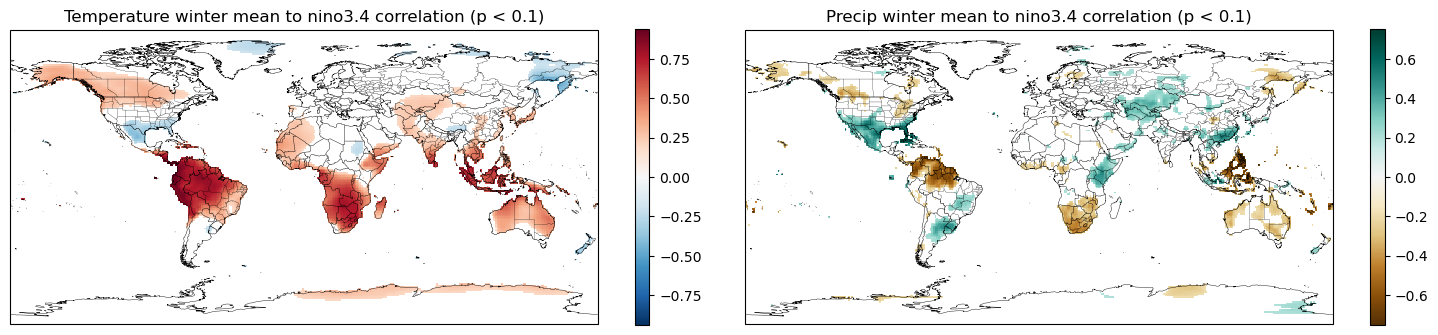

In [61]:
fig=plt.figure(figsize=(15,4))

ax=fig.add_subplot(121,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
ax.add_feature(cf.BORDERS.with_scale("50m"),lw=0.3)
ax.add_feature(cf.STATES.with_scale("50m"),lw=0.1)
cbar_kwargs={'shrink':0.8}
r_tDJF.where(p_tDJF<pval).plot(ax=ax,cmap='RdBu_r',cbar_kwargs=cbar_kwargs)
plt.title(f'Temperature winter mean to nino3.4 correlation (p < {pval})')

ax=fig.add_subplot(122,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
ax.add_feature(cf.BORDERS.with_scale("50m"),lw=0.3)
ax.add_feature(cf.STATES.with_scale("50m"),lw=0.1)
cbar_kwargs={'shrink':0.8}
r_prDJF.where(p_prDJF<pval).plot(ax=ax,cmap='BrBG',cbar_kwargs=cbar_kwargs)
plt.title(f'Precip winter mean to nino3.4 correlation (p < {pval})')

plt.tight_layout()
plt.show()

So now instead of separate composites of strong El Nino and La Nina winters, we have the correlation coefficient of the entire winter timeseries. El Nino and La Nina patterns are not separated here.

**What do the red and blue areas on the map of temperature correlations mean? What about the green and brown areas on the map of precipitation correlations?**

On the temperature correlation map:
- red areas mean a positive relationship between winter temperature and winter nino3.4 index --> generally warmer during el nino, cooler during la nina
- blue areas mean a negative relationship between winter temps and winter nino3.4 index --> generally warmer during la nina, cooler during el nino

On the precip correlation map:
- green areas mean a positive relationship between winter precip and winter nino3.4 index --> generally wetter during el nino, drier during la nina
- brown areas mean a negative relationship between winter precip and winter nino3.4 index --> generally wetter during la nina, drier during el nino


As you can see, we are getting at similar information here as we did with the composite analysis. The difference here is because we're working with the whole timeseries our results conflate the impacts of El Nino and La Nina on each correlation map.

## 6) How much variance in winter mean (DJF) precipitation and temperature is explained (r squared) by the winter mean nino3.4 index at the following locations? 
- Pilot Station, AK
- El Paso, TX
- Medellin, Colombia
- Johannesburg, South Africa
- Davao, Philippines
- Astana, Kazakhstan

We've already calculated what we need in our variables `r_tDJF` and `r_prDJF`. We only need to select the data point closest to each location and square r.

Let's take a look at where these places are by plotting a marker at each location on top of our correlation maps

In [62]:
places={'Pilot Station, AK':{'xy':(-162.8838,61.9369)},
        'El Paso, TX':{'xy':(-106.4850,31.7619)},
        'Medellin, Colombia':{'xy':(-75.5658,6.2476)},
        'Johannesburg, South Africa':{'xy':(28.0337,-26.2056)},
        'Astana, Kazakhstan':{'xy':(71.4272,51.1655)},
        'Davao, Philippines':{'xy':(125.6110,7.0736)}}

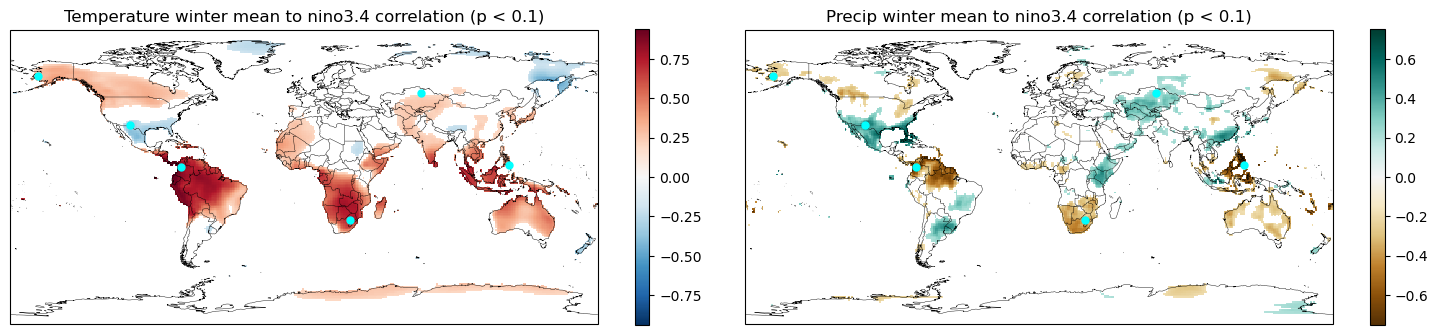

In [63]:
fig=plt.figure(figsize=(15,4))
cbar_kwargs={'shrink':0.8}

# temperature
ax=fig.add_subplot(121,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
ax.add_feature(cf.BORDERS.with_scale("50m"),lw=0.3)
# ax.add_feature(cf.STATES.with_scale("50m"),lw=0.1)
r_tDJF.where(p_tDJF<pval).plot(ax=ax,cmap='RdBu_r',cbar_kwargs=cbar_kwargs)
plt.title(f'Temperature winter mean to nino3.4 correlation (p < {pval})')

for nested_dict in places.values():
    x=nested_dict['xy'][0]
    y=nested_dict['xy'][1]
    ax.plot(x,y,marker='o',markersize=5,color='aqua')

# precipitation
ax=fig.add_subplot(122,projection=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE.with_scale("50m"),lw=0.3)
ax.add_feature(cf.BORDERS.with_scale("50m"),lw=0.3)
# ax.add_feature(cf.STATES.with_scale("50m"),lw=0.1)
r_prDJF.where(p_prDJF<pval).plot(ax=ax,cmap='BrBG',cbar_kwargs=cbar_kwargs)
plt.title(f'Precip winter mean to nino3.4 correlation (p < {pval})')

for nested_dict in places.values():
    x=nested_dict['xy'][0]
    y=nested_dict['xy'][1]
    ax.plot(x,y,marker='o',markersize=5,color='aqua')

plt.tight_layout()
plt.show()

In [64]:
# add % variance explained to the places dictionary and present it in a pretty pandas dataframe

for key,nested_dict in places.items():      
    lon=nested_dict['xy'][0]
    lat=nested_dict['xy'][1]
    r_t=(r_tDJF.sel(lat=lat, lon=lon, method='nearest')**2 *100).round(2)
    r_pr=(r_prDJF.sel(lat=lat, lon=lon, method='nearest')**2 *100).round(2)

    places[key]['t DJF % var explained by nino3.4']=r_t.item()
    places[key]['pr DJF % var explained by nino3.4']=r_pr.item()

pd.DataFrame.from_dict(places,orient='index')

,xy,t DJF % var explained by nino3.4,pr DJF % var explained by nino3.4
"Pilot Station, AK","(-162.8838, 61.9369)",7.12,7.14
"El Paso, TX","(-106.485, 31.7619)",10.40,28.05
"Medellin, Colombia","(-75.5658, 6.2476)",78.98,37.70
"Johannesburg, South Africa","(28.0337, -26.2056)",53.94,7.84
"Astana, Kazakhstan","(71.4272, 51.1655)",2.70,6.66
"Davao, Philippines","(125.611, 7.0736)",22.23,37.48


# Write a netcdf file

Showing how to write a netcdf file of your results. We'll write the variable `r_tDJF` to a file.

First, let's look at the labels/metadata attached to `r_tDJF`. We'll want to add additional variable and file metadata before we write the file.

In [65]:
r_tDJF

<xarray.DataArray (lat: 180, lon: 360)> Size: 518kB
array([[-0.01675708, -0.01660828, -0.01646183, ..., -0.01721856,
        -0.01706237, -0.01690855],
       [ 0.00131069,  0.00166537,  0.00201199, ...,  0.00019774,
         0.0005768 ,  0.0009478 ],
       [ 0.02162192,  0.02211697,  0.02259751, ...,  0.02005183,
         0.02058898,  0.02111251],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5

In [66]:
# add variable name
varname='r'
r_tDJF.name=varname

# add variable attributes
var_attrs={'standard_name':varname,
          'units':'unitless',
           '_FillValue':np.nan,
          'description':'correlation coefficient of detrended winter mean (DJF) Nino3.4 Index with detrended winter mean (DJF) temperature anomalies'}

r_tDJF=r_tDJF.assign_attrs(var_attrs)

# add lat coordinate attributes
lat_attrs={'standard_name':'latitude',
          'units':'degees_north',
          'axis':'Y'}
lon_attrs={'standard_name':'longitude',
          'units':'degees_east',
          'axis':'X'}

r_tDJF['lat']=r_tDJF.lat.assign_attrs(lat_attrs)
r_tDJF['lon']=r_tDJF.lon.assign_attrs(lon_attrs)

# change data type
# we don't need to save this variable with double precision
r_tDJF=r_tDJF.astype('float32')
r_tDJF

<xarray.DataArray 'r' (lat: 180, lon: 360)> Size: 259kB
array([[-0.01675708, -0.01660828, -0.01646183, ..., -0.01721856,
        -0.01706237, -0.01690855],
       [ 0.00131069,  0.00166537,  0.00201199, ...,  0.00019774,
         0.0005768 ,  0.0009478 ],
       [ 0.02162192,  0.02211697,  0.02259751, ...,  0.02005183,
         0.02058898,  0.02111251],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  r
    units:          unitless
    _FillValue:     nan
    description:    correlation coefficient of detrended winter mean (DJF) Ni...

In [67]:
# convert to dataset
ds_out=r_tDJF.to_dataset()

# assign file attributes
file_attrs={'temperature_data_source':'https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Gridded/Complete_TAVG_LatLong1.nc',
           'nino_index_data_source':'https://psl.noaa.gov/gcos_wgsp/Timeseries/Data/nino34.long.anom.data',
           'code_source':'https://github.com/kerriegeil/MSU_py_training/blob/main/learn_by_doing/enso_analysis.ipynb'}

ds_out.attrs=file_attrs

# maybe you'd also want to assign a spatial reference
ds_out.rio.write_crs("epsg:4326", inplace=True)  # rioxarray.write_crs()
ds_out[varname].attrs['coordinates']='spatial_ref'

ds_out

<xarray.Dataset> Size: 261kB
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon          (lon) float32 1kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
    spatial_ref  int32 4B 0
Data variables:
    r            (lat, lon) float32 259kB -0.01676 -0.01661 -0.01646 ... nan nan
Attributes:
    temperature_data_source:  https://berkeley-earth-temperature.s3.us-west-1...
    nino_index_data_source:   https://psl.noaa.gov/gcos_wgsp/Timeseries/Data/...
    code_source:              https://github.com/kerriegeil/MSU_py_training/b...

In [68]:
# write to file
outfile='some_descriptive_filename.nc'
ds_out.to_netcdf(outfile)


Read in our new netcdf file to make sure everything worked correctly

In [69]:
ds=xr.open_dataset(outfile)
ds

<xarray.Dataset> Size: 261kB
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon          (lon) float32 1kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
    spatial_ref  int32 4B ...
Data variables:
    r            (lat, lon) float32 259kB ...
Attributes:
    temperature_data_source:  https://berkeley-earth-temperature.s3.us-west-1...
    nino_index_data_source:   https://psl.noaa.gov/gcos_wgsp/Timeseries/Data/...
    code_source:              https://github.com/kerriegeil/MSU_py_training/b...

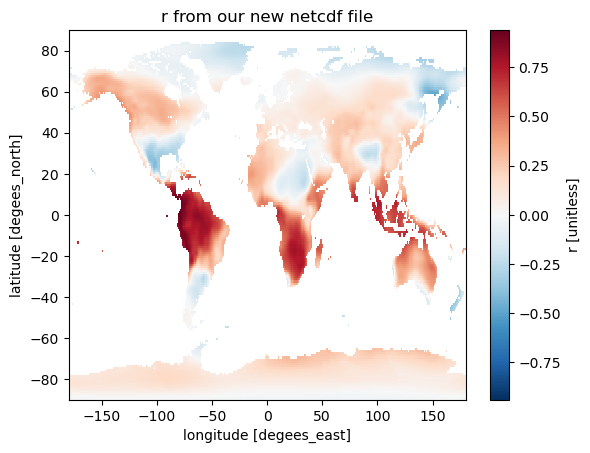

In [70]:
ds.r.plot()
plt.title('r from our new netcdf file')
plt.show()

Your Turn

1) Using a shapefile with boundaries for countries in South America, show a table of which countries experience anomalous temperature and precipitation during strong El Nino and La Nina events over at least 50% of the country's area.

2) Show what happens if you play with the magnitude threshold for defining an ENSO event. Use 0.4, 0.7, and 1.0 thresholds to compare how many ENSO events are identified in the Nino 3.4 timeseries. Create the composite of winter temperature during El Nino conditions for each of these thresholds, calculate statistical significance for each composite, and show where there are differences in the results.  

3) Repeat science question 3 using October-March for the winter months. Show (quantify) the difference between results using DJF and results using ONDJFM.


# Your Turn!

**Choose one of three mini-projects below to complete on your own and prepare to share your findings**


## Option 1 (easiest)
Calculate the monthly mean daily temperature range (DTR) at Starkville, determine whether there is a statistically significant trend, and create a figure showing the DTR timeseries, linear trend, and p value. Compare your results to climdex.org, looking at the trend in DTR over CONUS for similar data years (1977-2021) and also for data years 1922-2021 from the Berkeley Earth Surface Temperature dataset. 

&emsp;Hints:
- Use daily tmax and tmin data
- Apply the relevant steps from the data cleaning section (drop leap days)
- Calculate the daily temperature range as tmax-tmin
- For each month, find the mean daily temperature range
- Determine if there is a statistically significant trend in DTR at the 90% confidence level
- Plot the DTR timeseries with its linear trend line. Your plot should have x axis tick labels as years, a y axis label that describes the units, and a title that includes the p value.
- Go to **[climdex.org](https://www.climdex.org/access/)** and get the png of DTR trend over CONUS using data years 1977-2021 from the BEST dataset
- Go to **[climdex.org](https://www.climdex.org/access/)** and get the png of DTR trend over CONUS using data years 1922-2021 from the BEST dataset

![cci_option1_figure.png](figs/cci_option1_figure.png)

## Option 2 (moderate)
Modify the TNx analysis to operate on gridded data (3-dimensional instead of the 1-dimensional data used in this notebook), performing all calculations at each grid cell. Include the relevant parts of the data cleaning section, calculate TNx, and then calculate the January TNx trend and pvalue. Present your results in a figure that shows the January TNx trend in C/year for each grid cell on a map if it is statistically significant at the 95% confidence level. Compare your results to climdex.org, looking at the trend in Jan TNx over CONUS for similar data years (1975-2019) and also for data years 1920-2019 from the Berkeley Earth Surface Temperature dataset.

&emsp;Hints:
- Use gridded tmin data for Mississippi from the file tmin_AgERA5_Mississippi_Daily_1979-2023.nc
- For data cleaning, do the steps that apply to tn only
    - nan for daily temperature greater than 70C or less than -70C
    - remove leap days
    - daily temperature outliers (5x std)
    - you may also want to use the function get_nans_per_month to plot the maximum number of nans per month found at each grid cell
- To use scipy.stats.linregress with multidimensional data, use **[xr.stack](https://docs.xarray.dev/en/latest/generated/xarray.DataArray.stack.html)** and a for loop or use nested for loops. Alternatively, write your own function to vectorize calculation of linear trend and pvalue.
- Plot the map of Jan trend values with units C/year, but only show the trend at grid cells that are statistically significant at the 95% confidence level or greater (use the p value and **[xarray.DataArray.where](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.where.html)** to mask out insignificant trends)
- Draw state boundaries on your map with cartopy (import cartopy.crs as ccrs, import cartopy.feature as cf) or use a different method/package of your choice
- Go to **[climdex.org](https://www.climdex.org/access/)** and get the png of Jan TNx trend over CONUS using data years 1975-2019 from the BEST dataset
- Go to **[climdex.org](https://www.climdex.org/access/)** and get the png of Jan TNx trend over CONUS using data years 1920-2019 from the BEST dataset

![cci_option2_figure.png](figs/cci_option2_figure.png)

## Option 3 (moderate, longest)
Calculate the warm spell duration index (WSDI) at Starkville, determine whether there is a statistically significant trend, and create a figure showing the WSDI timeseries, linear trend, and p value. Compare your results to climdex.org, looking at the trend in WSDI over CONUS for similar data years (1977-2021) and also for data years 1922-2021 from the Berkeley Earth Surface Temperature dataset.

&emsp;Hints:
- Use daily tmax data but drop leap days entirely
- Calculate WSDI using the following criteria
    - 6 consecutive days of hot maximum temperatures
    - hot temperature threshold defined as > 90th percentile of tx for each calendar day using a centered 5-day window in the base period 1981-2010
    - warm spells that contain dates over multiple years are assigned to the year when the spell ends
- Determine if there is a statistically significant trend in DTR at the 90% confidence level
- Plot the DTR timeseries with its linear trend line. Your plot should have x axis tick labels as years, a y axis label that describes the units, and a title that includes the p value.
- Go to **[climdex.org](https://www.climdex.org/access/)** and get the png of WSDI trend over CONUS using data years 1977-2021 from the BEST dataset
- Go to **[climdex.org](https://www.climdex.org/access/)** and get the png of WSDI trend over CONUS using data years 1922-2021 from the BEST dataset

![cci_option3_figure.png](figs/cci_option3_figure.png)
